In [13]:
import os
import re
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import gridspec
import pandas as pd
from typing import List
import warnings
import time
from tsml_eval.publications.y2023.tsc_bakeoff.run_experiments import _set_bakeoff_classifier

warnings.filterwarnings("ignore", category=FutureWarning)
warnings.filterwarnings("ignore", category=UserWarning)


from src.classifierWrapper import BakeoffClassifier
from src.basic_func import dataset_provider,dataset_overview, overview_of_bakeoff_cl
from src.apply_dca import apply_label_errors, percentage_to_instance_converter
from src.utils import load_and_expand_yaml, get_frames_and_names
from src.visualizations import visualize_acc_decr, visualize_trace_M, visualize_acc_decr_multiple
from src.current_experiment import Experiment
from src.data_processing import generate_master_df, unpack_and_interpolate, create_nested_df_from_exp_dict, extend_nested_df_with_properties
from src.data_processing import aggregate_accuracy_curvers_multiple

In [3]:
configuration_2 = load_and_expand_yaml("experiments/experiment_2.yaml")
configuration_3 = load_and_expand_yaml("experiments/experiment_3.yaml")

[2025-08-19 15:04:21] INFO - Loading and expanding YAML configuration from: experiments/experiment_2.yaml
[2025-08-19 15:04:21] INFO - YAML configuration expanded into 30 configurations
[2025-08-19 15:04:21] INFO - Loading and expanding YAML configuration from: experiments/experiment_3.yaml
[2025-08-19 15:04:21] INFO - YAML configuration expanded into 93 configurations


In [4]:
#experimental_dict should contain all experimental results. 
# It is a dictionary with the experiment name as key and a list of the configuration and a 2 elemental list as a value
# The 2 elemental list contains the configuration and the current experiment object

experimental_dict = {}
my_config = configuration_2[0:6]    #3Clx1DSx3RS 
my_config2 = configuration_2[6::3] #1Clx8DS
my_config3 = configuration_3[:]    #3Clx31DS

for i_, exp_conf in enumerate(my_config3):
    current_exp = Experiment(config=exp_conf, base_path="112UCRFolds", results_root="simulation_results")
    exp_name = "experiment_"+str(i_)
    current_exp.run_experiment()
    experimental_dict[exp_name]=[exp_conf, current_exp]

[2025-08-19 15:05:49] INFO - X_train             : (390, 1, 176)
[2025-08-19 15:05:49] INFO - y_train             : (390,)
[2025-08-19 15:05:49] INFO - X_test              : (391, 1, 176)
[2025-08-19 15:05:49] INFO - y_test              : (391,)
[2025-08-19 15:05:49] INFO - X_train_small       : (390, 1, 176)
[2025-08-19 15:05:49] INFO - y_train_small       : (390,)
[2025-08-19 15:05:49] INFO - X_test_small        : (391, 1, 176)
[2025-08-19 15:05:49] INFO - y_test_small        : (391,)
[2025-08-19 15:05:49] INFO - Initializing BakeoffClassifier with name: MR-Hydra, random_state: 0
[2025-08-19 15:05:49] INFO - Using 6 jobs for classifier training and prediction
OMP: Info #276: omp_set_nested routine deprecated, please use omp_set_max_active_levels instead.
[2025-08-19 15:05:50] INFO - Initializing Exp with dataset: Adiac, classifier: MR-Hydra, strategy: LabelErrors
[2025-08-19 15:05:50] INFO - and configuration with DCA-type: LabelErrors, DoE_param: {'le_strategy': 'leV1', 'p_vec': 'No

Cap reached
Cap reached


[2025-08-19 15:05:50] INFO - ✅ Results loaded from: simulation_results/Quant/Adiac/leV1_0_0_390_8
[2025-08-19 15:05:50] INFO - X_train             : (390, 1, 176)
[2025-08-19 15:05:50] INFO - y_train             : (390,)
[2025-08-19 15:05:50] INFO - X_test              : (391, 1, 176)
[2025-08-19 15:05:50] INFO - y_test              : (391,)
[2025-08-19 15:05:50] INFO - X_train_small       : (390, 1, 176)
[2025-08-19 15:05:50] INFO - y_train_small       : (390,)
[2025-08-19 15:05:50] INFO - X_test_small        : (391, 1, 176)
[2025-08-19 15:05:50] INFO - y_test_small        : (391,)
[2025-08-19 15:05:50] INFO - Initializing BakeoffClassifier with name: Weasel-D, random_state: 0
[2025-08-19 15:05:50] INFO - Using 6 jobs for classifier training and prediction
[2025-08-19 15:05:50] INFO - Initializing Exp with dataset: Adiac, classifier: Weasel-D, strategy: LabelErrors
[2025-08-19 15:05:50] INFO - and configuration with DCA-type: LabelErrors, DoE_param: {'le_strategy': 'leV1', 'p_vec': 'N

Cap reached
Cap reached
Cap reached
Cap reached
Cap reached
Cap reached


[2025-08-19 15:05:51] INFO - ✅ Results loaded from: simulation_results/Quant/Car/leV1_0_0_60_1
[2025-08-19 15:05:51] INFO - X_train             : (60, 1, 577)
[2025-08-19 15:05:51] INFO - y_train             : (60,)
[2025-08-19 15:05:51] INFO - X_test              : (60, 1, 577)
[2025-08-19 15:05:51] INFO - y_test              : (60,)
[2025-08-19 15:05:51] INFO - X_train_small       : (60, 1, 577)
[2025-08-19 15:05:51] INFO - y_train_small       : (60,)
[2025-08-19 15:05:51] INFO - X_test_small        : (60, 1, 577)
[2025-08-19 15:05:51] INFO - y_test_small        : (60,)
[2025-08-19 15:05:51] INFO - Initializing BakeoffClassifier with name: Weasel-D, random_state: 0
[2025-08-19 15:05:51] INFO - Using 6 jobs for classifier training and prediction
[2025-08-19 15:05:51] INFO - Initializing Exp with dataset: Car, classifier: Weasel-D, strategy: LabelErrors
[2025-08-19 15:05:51] INFO - and configuration with DCA-type: LabelErrors, DoE_param: {'le_strategy': 'leV1', 'p_vec': 'None', 'random

Cap reached
Cap reached
Cap reached
Cap reached
Cap reached


[2025-08-19 15:05:51] INFO - ✅ Results loaded from: simulation_results/MR-Hydra/Computers/leV1_0_0_250_5
[2025-08-19 15:05:51] INFO - X_train             : (250, 1, 720)
[2025-08-19 15:05:51] INFO - y_train             : (250,)
[2025-08-19 15:05:51] INFO - X_test              : (250, 1, 720)
[2025-08-19 15:05:51] INFO - y_test              : (250,)
[2025-08-19 15:05:51] INFO - X_train_small       : (250, 1, 720)
[2025-08-19 15:05:51] INFO - y_train_small       : (250,)
[2025-08-19 15:05:51] INFO - X_test_small        : (250, 1, 720)
[2025-08-19 15:05:51] INFO - y_test_small        : (250,)
[2025-08-19 15:05:51] INFO - Initializing BakeoffClassifier with name: Quant, random_state: 0
[2025-08-19 15:05:51] INFO - Using 6 jobs for classifier training and prediction
[2025-08-19 15:05:51] INFO - Initializing Exp with dataset: Computers, classifier: Quant, strategy: LabelErrors
[2025-08-19 15:05:51] INFO - and configuration with DCA-type: LabelErrors, DoE_param: {'le_strategy': 'leV1', 'p_vec

Cap reached
Cap reached


[2025-08-19 15:05:51] INFO - X_train             : (7200, 1, 46)
[2025-08-19 15:05:51] INFO - y_train             : (7200,)
[2025-08-19 15:05:51] INFO - X_test              : (16800, 1, 46)
[2025-08-19 15:05:51] INFO - y_test              : (16800,)
[2025-08-19 15:05:51] INFO - X_train_small       : (7200, 1, 46)
[2025-08-19 15:05:51] INFO - y_train_small       : (7200,)
[2025-08-19 15:05:51] INFO - X_test_small        : (16800, 1, 46)
[2025-08-19 15:05:51] INFO - y_test_small        : (16800,)
[2025-08-19 15:05:51] INFO - Initializing BakeoffClassifier with name: MR-Hydra, random_state: 0
[2025-08-19 15:05:51] INFO - Using 6 jobs for classifier training and prediction
[2025-08-19 15:05:51] INFO - Initializing Exp with dataset: Crop, classifier: MR-Hydra, strategy: LabelErrors
[2025-08-19 15:05:51] INFO - and configuration with DCA-type: LabelErrors, DoE_param: {'le_strategy': 'leV1', 'p_vec': 'None', 'random_seed': 0, 'start': 0, 'stop': 100, 'step': 2}
[2025-08-19 15:05:51] INFO - Ru

Cap reached


[2025-08-19 15:05:52] INFO - X_train             : (7200, 1, 46)
[2025-08-19 15:05:52] INFO - y_train             : (7200,)
[2025-08-19 15:05:52] INFO - X_test              : (16800, 1, 46)
[2025-08-19 15:05:52] INFO - y_test              : (16800,)
[2025-08-19 15:05:52] INFO - X_train_small       : (7200, 1, 46)
[2025-08-19 15:05:52] INFO - y_train_small       : (7200,)
[2025-08-19 15:05:52] INFO - X_test_small        : (16800, 1, 46)
[2025-08-19 15:05:52] INFO - y_test_small        : (16800,)
[2025-08-19 15:05:52] INFO - Initializing BakeoffClassifier with name: Quant, random_state: 0
[2025-08-19 15:05:52] INFO - Using 6 jobs for classifier training and prediction
[2025-08-19 15:05:52] INFO - Initializing Exp with dataset: Crop, classifier: Quant, strategy: LabelErrors
[2025-08-19 15:05:52] INFO - and configuration with DCA-type: LabelErrors, DoE_param: {'le_strategy': 'leV1', 'p_vec': 'None', 'random_seed': 0, 'start': 0, 'stop': 100, 'step': 2}
[2025-08-19 15:05:52] INFO - Run Expe

Cap reached


[2025-08-19 15:05:52] INFO - ✅ Results loaded from: simulation_results/Quant/Crop/leV1_0_0_7200_144
[2025-08-19 15:05:52] INFO - X_train             : (7200, 1, 46)
[2025-08-19 15:05:52] INFO - y_train             : (7200,)
[2025-08-19 15:05:52] INFO - X_test              : (16800, 1, 46)
[2025-08-19 15:05:52] INFO - y_test              : (16800,)
[2025-08-19 15:05:52] INFO - X_train_small       : (7200, 1, 46)
[2025-08-19 15:05:52] INFO - y_train_small       : (7200,)
[2025-08-19 15:05:52] INFO - X_test_small        : (16800, 1, 46)
[2025-08-19 15:05:52] INFO - y_test_small        : (16800,)
[2025-08-19 15:05:52] INFO - Initializing BakeoffClassifier with name: Weasel-D, random_state: 0
[2025-08-19 15:05:52] INFO - Using 6 jobs for classifier training and prediction
[2025-08-19 15:05:52] INFO - Initializing Exp with dataset: Crop, classifier: Weasel-D, strategy: LabelErrors
[2025-08-19 15:05:52] INFO - and configuration with DCA-type: LabelErrors, DoE_param: {'le_strategy': 'leV1', 'p

Cap reached


[2025-08-19 15:05:52] INFO - X_train             : (322, 1, 512)
[2025-08-19 15:05:52] INFO - y_train             : (322,)
[2025-08-19 15:05:52] INFO - X_test              : (139, 1, 512)
[2025-08-19 15:05:52] INFO - y_test              : (139,)
[2025-08-19 15:05:52] INFO - X_train_small       : (322, 1, 512)
[2025-08-19 15:05:52] INFO - y_train_small       : (322,)
[2025-08-19 15:05:52] INFO - X_test_small        : (139, 1, 512)
[2025-08-19 15:05:52] INFO - y_test_small        : (139,)
[2025-08-19 15:05:52] INFO - Initializing BakeoffClassifier with name: MR-Hydra, random_state: 0
[2025-08-19 15:05:52] INFO - Using 6 jobs for classifier training and prediction
[2025-08-19 15:05:52] INFO - Initializing Exp with dataset: Earthquakes, classifier: MR-Hydra, strategy: LabelErrors
[2025-08-19 15:05:52] INFO - and configuration with DCA-type: LabelErrors, DoE_param: {'le_strategy': 'leV1', 'p_vec': 'None', 'random_seed': 0, 'start': 0, 'stop': 100, 'step': 2}
[2025-08-19 15:05:52] INFO - Run

Cap reached
Cap reached
Cap reached
Cap reached


[2025-08-19 15:05:52] INFO - ✅ Results loaded from: simulation_results/MR-Hydra/ECG200/leV1_0_0_100_2
[2025-08-19 15:05:52] INFO - X_train             : (100, 1, 96)
[2025-08-19 15:05:52] INFO - y_train             : (100,)
[2025-08-19 15:05:52] INFO - X_test              : (100, 1, 96)
[2025-08-19 15:05:52] INFO - y_test              : (100,)
[2025-08-19 15:05:52] INFO - X_train_small       : (100, 1, 96)
[2025-08-19 15:05:52] INFO - y_train_small       : (100,)
[2025-08-19 15:05:52] INFO - X_test_small        : (100, 1, 96)
[2025-08-19 15:05:52] INFO - y_test_small        : (100,)
[2025-08-19 15:05:52] INFO - Initializing BakeoffClassifier with name: Quant, random_state: 0
[2025-08-19 15:05:52] INFO - Using 6 jobs for classifier training and prediction
[2025-08-19 15:05:52] INFO - Initializing Exp with dataset: ECG200, classifier: Quant, strategy: LabelErrors
[2025-08-19 15:05:52] INFO - and configuration with DCA-type: LabelErrors, DoE_param: {'le_strategy': 'leV1', 'p_vec': 'None',

Cap reached
Cap reached
Cap reached


[2025-08-19 15:05:53] INFO - Initializing Exp with dataset: ACSF1, classifier: Quant, strategy: LabelErrors
[2025-08-19 15:05:53] INFO - and configuration with DCA-type: LabelErrors, DoE_param: {'le_strategy': 'leV1', 'p_vec': 'None', 'random_seed': 0, 'start': 0, 'stop': 100, 'step': 2}
[2025-08-19 15:05:53] INFO - Run Experiment
[2025-08-19 15:05:53] INFO - Converting percentage-based DOE parameters to instance-based parameters
[2025-08-19 15:05:53] INFO - requested_instance_step = 2.0 will be transformed into 2
[2025-08-19 15:05:53] INFO - requested_percentage_step = 2 % || transformed into 2.0 %
[2025-08-19 15:05:53] INFO - Converting percentage-based DOE parameters to instance-based parameters
[2025-08-19 15:05:53] INFO - stop value is 100% --> set to number of instances
[2025-08-19 15:05:53] WARNING - Could not assign GPU: NVML Shared Library Not Found
[2025-08-19 15:05:53] INFO - label_names: ['0' '1' '2' '3' '4' '5' '6' '7' '8' '9']
[2025-08-19 15:05:53] INFO - Current Label Er

Cap reached
Cap reached
Cap reached
Cap reached
Cap reached


[2025-08-19 15:05:53] INFO - X_train             : (30, 1, 128)
[2025-08-19 15:05:53] INFO - y_train             : (30,)
[2025-08-19 15:05:53] INFO - X_test              : (900, 1, 128)
[2025-08-19 15:05:53] INFO - y_test              : (900,)
[2025-08-19 15:05:53] INFO - X_train_small       : (30, 1, 128)
[2025-08-19 15:05:53] INFO - y_train_small       : (30,)
[2025-08-19 15:05:53] INFO - X_test_small        : (900, 1, 128)
[2025-08-19 15:05:53] INFO - y_test_small        : (900,)
[2025-08-19 15:05:53] INFO - Initializing BakeoffClassifier with name: MR-Hydra, random_state: 0
[2025-08-19 15:05:53] INFO - Using 6 jobs for classifier training and prediction
[2025-08-19 15:05:53] INFO - Initializing Exp with dataset: CBF, classifier: MR-Hydra, strategy: LabelErrors
[2025-08-19 15:05:53] INFO - and configuration with DCA-type: LabelErrors, DoE_param: {'le_strategy': 'leV1', 'p_vec': 'None', 'random_seed': 0, 'start': 0, 'stop': 100, 'step': 2}
[2025-08-19 15:05:53] INFO - Run Experiment


Cap reached
Cap reached
Cap reached
Cap reached
Cap reached


[2025-08-19 15:05:53] INFO - ✅ Results loaded from: simulation_results/Quant/Coffee/leV1_0_0_28_1
[2025-08-19 15:05:53] INFO - X_train             : (28, 1, 286)
[2025-08-19 15:05:53] INFO - y_train             : (28,)
[2025-08-19 15:05:53] INFO - X_test              : (28, 1, 286)
[2025-08-19 15:05:53] INFO - y_test              : (28,)
[2025-08-19 15:05:53] INFO - X_train_small       : (28, 1, 286)
[2025-08-19 15:05:53] INFO - y_train_small       : (28,)
[2025-08-19 15:05:53] INFO - X_test_small        : (28, 1, 286)
[2025-08-19 15:05:53] INFO - y_test_small        : (28,)
[2025-08-19 15:05:53] INFO - Initializing BakeoffClassifier with name: Weasel-D, random_state: 0
[2025-08-19 15:05:53] INFO - Using 6 jobs for classifier training and prediction
[2025-08-19 15:05:53] INFO - Initializing Exp with dataset: Coffee, classifier: Weasel-D, strategy: LabelErrors
[2025-08-19 15:05:53] INFO - and configuration with DCA-type: LabelErrors, DoE_param: {'le_strategy': 'leV1', 'p_vec': 'None', '

Cap reached
Cap reached
Cap reached
Cap reached
Cap reached


[2025-08-19 15:05:53] INFO - Using 6 jobs for classifier training and prediction
[2025-08-19 15:05:53] INFO - Initializing Exp with dataset: BirdChicken, classifier: Quant, strategy: LabelErrors
[2025-08-19 15:05:53] INFO - and configuration with DCA-type: LabelErrors, DoE_param: {'le_strategy': 'leV1', 'p_vec': 'None', 'random_seed': 0, 'start': 0, 'stop': 100, 'step': 2}
[2025-08-19 15:05:53] INFO - Run Experiment
[2025-08-19 15:05:53] INFO - Converting percentage-based DOE parameters to instance-based parameters
[2025-08-19 15:05:53] INFO - requested_instance_step = 0.4 will be transformed into 0
[2025-08-19 15:05:53] INFO - requested_percentage_step = 2 % || transformed into 0.0 %
[2025-08-19 15:05:53] INFO - requested instances per step < 0.5 --> rounded up to 1 because its smallest possible increment
[2025-08-19 15:05:53] INFO - Converting percentage-based DOE parameters to instance-based parameters
[2025-08-19 15:05:53] INFO - stop value is 100% --> set to number of instances
[2

Cap reached
Cap reached
Cap reached
Cap reached
Cap reached


[2025-08-19 15:05:54] INFO - X_train             : (467, 1, 166)
[2025-08-19 15:05:54] INFO - y_train             : (467,)
[2025-08-19 15:05:54] INFO - X_test              : (3840, 1, 166)
[2025-08-19 15:05:54] INFO - y_test              : (3840,)
[2025-08-19 15:05:54] INFO - X_train_small       : (467, 1, 166)
[2025-08-19 15:05:54] INFO - y_train_small       : (467,)
[2025-08-19 15:05:54] INFO - X_test_small        : (3840, 1, 166)
[2025-08-19 15:05:54] INFO - y_test_small        : (3840,)
[2025-08-19 15:05:54] INFO - Initializing BakeoffClassifier with name: MR-Hydra, random_state: 0
[2025-08-19 15:05:54] INFO - Using 6 jobs for classifier training and prediction
[2025-08-19 15:05:54] INFO - Initializing Exp with dataset: ChlorineConcentration, classifier: MR-Hydra, strategy: LabelErrors
[2025-08-19 15:05:54] INFO - and configuration with DCA-type: LabelErrors, DoE_param: {'le_strategy': 'leV1', 'p_vec': 'None', 'random_seed': 0, 'start': 0, 'stop': 100, 'step': 2}
[2025-08-19 15:05:

Cap reached
Cap reached


[2025-08-19 15:05:54] INFO - ✅ Results loaded from: simulation_results/Quant/ChlorineConcentration/leV1_0_0_467_9
[2025-08-19 15:05:54] INFO - X_train             : (467, 1, 166)
[2025-08-19 15:05:54] INFO - y_train             : (467,)
[2025-08-19 15:05:54] INFO - X_test              : (3840, 1, 166)
[2025-08-19 15:05:54] INFO - y_test              : (3840,)
[2025-08-19 15:05:54] INFO - X_train_small       : (467, 1, 166)
[2025-08-19 15:05:54] INFO - y_train_small       : (467,)
[2025-08-19 15:05:54] INFO - X_test_small        : (3840, 1, 166)
[2025-08-19 15:05:54] INFO - y_test_small        : (3840,)
[2025-08-19 15:05:54] INFO - Initializing BakeoffClassifier with name: Weasel-D, random_state: 0
[2025-08-19 15:05:54] INFO - Using 6 jobs for classifier training and prediction
[2025-08-19 15:05:54] INFO - Initializing Exp with dataset: ChlorineConcentration, classifier: Weasel-D, strategy: LabelErrors
[2025-08-19 15:05:54] INFO - and configuration with DCA-type: LabelErrors, DoE_param:

Cap reached
Cap reached
Cap reached
Cap reached


[2025-08-19 15:05:54] INFO - X_train             : (40, 1, 1639)
[2025-08-19 15:05:54] INFO - y_train             : (40,)
[2025-08-19 15:05:54] INFO - X_test              : (1380, 1, 1639)
[2025-08-19 15:05:54] INFO - y_test              : (1380,)
[2025-08-19 15:05:54] INFO - X_train_small       : (40, 1, 1639)
[2025-08-19 15:05:54] INFO - y_train_small       : (40,)
[2025-08-19 15:05:54] INFO - X_test_small        : (1380, 1, 1639)
[2025-08-19 15:05:54] INFO - y_test_small        : (1380,)
[2025-08-19 15:05:54] INFO - Initializing BakeoffClassifier with name: MR-Hydra, random_state: 0
[2025-08-19 15:05:54] INFO - Using 6 jobs for classifier training and prediction
[2025-08-19 15:05:54] INFO - Initializing Exp with dataset: CinCECGTorso, classifier: MR-Hydra, strategy: LabelErrors
[2025-08-19 15:05:54] INFO - and configuration with DCA-type: LabelErrors, DoE_param: {'le_strategy': 'leV1', 'p_vec': 'None', 'random_seed': 0, 'start': 0, 'stop': 100, 'step': 2}
[2025-08-19 15:05:54] INFO 

Cap reached


[2025-08-19 15:05:55] INFO - X_train             : (40, 1, 1639)
[2025-08-19 15:05:55] INFO - y_train             : (40,)
[2025-08-19 15:05:55] INFO - X_test              : (1380, 1, 1639)
[2025-08-19 15:05:55] INFO - y_test              : (1380,)
[2025-08-19 15:05:55] INFO - X_train_small       : (40, 1, 1639)
[2025-08-19 15:05:55] INFO - y_train_small       : (40,)
[2025-08-19 15:05:55] INFO - X_test_small        : (1380, 1, 1639)
[2025-08-19 15:05:55] INFO - y_test_small        : (1380,)
[2025-08-19 15:05:55] INFO - Initializing BakeoffClassifier with name: Quant, random_state: 0
[2025-08-19 15:05:55] INFO - Using 6 jobs for classifier training and prediction
[2025-08-19 15:05:55] INFO - Initializing Exp with dataset: CinCECGTorso, classifier: Quant, strategy: LabelErrors
[2025-08-19 15:05:55] INFO - and configuration with DCA-type: LabelErrors, DoE_param: {'le_strategy': 'leV1', 'p_vec': 'None', 'random_seed': 0, 'start': 0, 'stop': 100, 'step': 2}
[2025-08-19 15:05:55] INFO - Run 

Cap reached


[2025-08-19 15:05:55] INFO - X_train             : (40, 1, 1639)
[2025-08-19 15:05:55] INFO - y_train             : (40,)
[2025-08-19 15:05:55] INFO - X_test              : (1380, 1, 1639)
[2025-08-19 15:05:55] INFO - y_test              : (1380,)
[2025-08-19 15:05:55] INFO - X_train_small       : (40, 1, 1639)
[2025-08-19 15:05:55] INFO - y_train_small       : (40,)
[2025-08-19 15:05:55] INFO - X_test_small        : (1380, 1, 1639)
[2025-08-19 15:05:55] INFO - y_test_small        : (1380,)
[2025-08-19 15:05:55] INFO - Initializing BakeoffClassifier with name: Weasel-D, random_state: 0
[2025-08-19 15:05:55] INFO - Using 6 jobs for classifier training and prediction
[2025-08-19 15:05:55] INFO - Initializing Exp with dataset: CinCECGTorso, classifier: Weasel-D, strategy: LabelErrors
[2025-08-19 15:05:55] INFO - and configuration with DCA-type: LabelErrors, DoE_param: {'le_strategy': 'leV1', 'p_vec': 'None', 'random_seed': 0, 'start': 0, 'stop': 100, 'step': 2}
[2025-08-19 15:05:55] INFO 

Cap reached
Cap reached
Cap reached


[2025-08-19 15:05:55] INFO - X_train             : (390, 1, 300)
[2025-08-19 15:05:55] INFO - y_train             : (390,)
[2025-08-19 15:05:55] INFO - X_test              : (390, 1, 300)
[2025-08-19 15:05:55] INFO - y_test              : (390,)
[2025-08-19 15:05:55] INFO - X_train_small       : (390, 1, 300)
[2025-08-19 15:05:55] INFO - y_train_small       : (390,)
[2025-08-19 15:05:55] INFO - X_test_small        : (390, 1, 300)
[2025-08-19 15:05:55] INFO - y_test_small        : (390,)
[2025-08-19 15:05:55] INFO - Initializing BakeoffClassifier with name: Weasel-D, random_state: 0
[2025-08-19 15:05:55] INFO - Using 6 jobs for classifier training and prediction
[2025-08-19 15:05:55] INFO - Initializing Exp with dataset: CricketX, classifier: Weasel-D, strategy: LabelErrors
[2025-08-19 15:05:55] INFO - and configuration with DCA-type: LabelErrors, DoE_param: {'le_strategy': 'leV1', 'p_vec': 'None', 'random_seed': 0, 'start': 0, 'stop': 100, 'step': 2}
[2025-08-19 15:05:55] INFO - Run Ex

Cap reached
Cap reached
Cap reached


[2025-08-19 15:05:56] INFO - X_train             : (390, 1, 300)
[2025-08-19 15:05:56] INFO - y_train             : (390,)
[2025-08-19 15:05:56] INFO - X_test              : (390, 1, 300)
[2025-08-19 15:05:56] INFO - y_test              : (390,)
[2025-08-19 15:05:56] INFO - X_train_small       : (390, 1, 300)
[2025-08-19 15:05:56] INFO - y_train_small       : (390,)
[2025-08-19 15:05:56] INFO - X_test_small        : (390, 1, 300)
[2025-08-19 15:05:56] INFO - y_test_small        : (390,)
[2025-08-19 15:05:56] INFO - Initializing BakeoffClassifier with name: Weasel-D, random_state: 0
[2025-08-19 15:05:56] INFO - Using 6 jobs for classifier training and prediction
[2025-08-19 15:05:56] INFO - Initializing Exp with dataset: CricketY, classifier: Weasel-D, strategy: LabelErrors
[2025-08-19 15:05:56] INFO - and configuration with DCA-type: LabelErrors, DoE_param: {'le_strategy': 'leV1', 'p_vec': 'None', 'random_seed': 0, 'start': 0, 'stop': 100, 'step': 2}
[2025-08-19 15:05:56] INFO - Run Ex

Cap reached
Cap reached
Cap reached


[2025-08-19 15:05:56] INFO - X_train             : (390, 1, 300)
[2025-08-19 15:05:56] INFO - y_train             : (390,)
[2025-08-19 15:05:56] INFO - X_test              : (390, 1, 300)
[2025-08-19 15:05:56] INFO - y_test              : (390,)
[2025-08-19 15:05:56] INFO - X_train_small       : (390, 1, 300)
[2025-08-19 15:05:56] INFO - y_train_small       : (390,)
[2025-08-19 15:05:56] INFO - X_test_small        : (390, 1, 300)
[2025-08-19 15:05:56] INFO - y_test_small        : (390,)
[2025-08-19 15:05:56] INFO - Initializing BakeoffClassifier with name: Weasel-D, random_state: 0
[2025-08-19 15:05:56] INFO - Using 6 jobs for classifier training and prediction
[2025-08-19 15:05:56] INFO - Initializing Exp with dataset: CricketZ, classifier: Weasel-D, strategy: LabelErrors
[2025-08-19 15:05:56] INFO - and configuration with DCA-type: LabelErrors, DoE_param: {'le_strategy': 'leV1', 'p_vec': 'None', 'random_seed': 0, 'start': 0, 'stop': 100, 'step': 2}
[2025-08-19 15:05:56] INFO - Run Ex

Cap reached
Cap reached
Cap reached
Cap reached


[2025-08-19 15:05:56] INFO - X_train             : (500, 1, 140)
[2025-08-19 15:05:56] INFO - y_train             : (500,)
[2025-08-19 15:05:56] INFO - X_test              : (4500, 1, 140)
[2025-08-19 15:05:56] INFO - y_test              : (4500,)
[2025-08-19 15:05:56] INFO - X_train_small       : (500, 1, 140)
[2025-08-19 15:05:56] INFO - y_train_small       : (500,)
[2025-08-19 15:05:56] INFO - X_test_small        : (4500, 1, 140)
[2025-08-19 15:05:56] INFO - y_test_small        : (4500,)
[2025-08-19 15:05:56] INFO - Initializing BakeoffClassifier with name: MR-Hydra, random_state: 0
[2025-08-19 15:05:56] INFO - Using 6 jobs for classifier training and prediction
[2025-08-19 15:05:56] INFO - Initializing Exp with dataset: ECG5000, classifier: MR-Hydra, strategy: LabelErrors
[2025-08-19 15:05:56] INFO - and configuration with DCA-type: LabelErrors, DoE_param: {'le_strategy': 'leV1', 'p_vec': 'None', 'random_seed': 0, 'start': 0, 'stop': 100, 'step': 2}
[2025-08-19 15:05:56] INFO - Run

Cap reached
Cap reached


[2025-08-19 15:05:56] INFO - X_train             : (500, 1, 140)
[2025-08-19 15:05:56] INFO - y_train             : (500,)
[2025-08-19 15:05:56] INFO - X_test              : (4500, 1, 140)
[2025-08-19 15:05:56] INFO - y_test              : (4500,)
[2025-08-19 15:05:56] INFO - X_train_small       : (500, 1, 140)
[2025-08-19 15:05:56] INFO - y_train_small       : (500,)
[2025-08-19 15:05:56] INFO - X_test_small        : (4500, 1, 140)
[2025-08-19 15:05:56] INFO - y_test_small        : (4500,)
[2025-08-19 15:05:56] INFO - Initializing BakeoffClassifier with name: Weasel-D, random_state: 0
[2025-08-19 15:05:56] INFO - Using 6 jobs for classifier training and prediction
[2025-08-19 15:05:56] INFO - Initializing Exp with dataset: ECG5000, classifier: Weasel-D, strategy: LabelErrors
[2025-08-19 15:05:56] INFO - and configuration with DCA-type: LabelErrors, DoE_param: {'le_strategy': 'leV1', 'p_vec': 'None', 'random_seed': 0, 'start': 0, 'stop': 100, 'step': 2}
[2025-08-19 15:05:56] INFO - Run

Cap reached
Cap reached
Cap reached
Cap reached


[2025-08-19 15:05:57] INFO - X_train             : (8926, 1, 96)
[2025-08-19 15:05:57] INFO - y_train             : (8926,)
[2025-08-19 15:05:57] INFO - X_test              : (7711, 1, 96)
[2025-08-19 15:05:57] INFO - y_test              : (7711,)
[2025-08-19 15:05:57] INFO - X_train_small       : (8926, 1, 96)
[2025-08-19 15:05:57] INFO - y_train_small       : (8926,)
[2025-08-19 15:05:57] INFO - X_test_small        : (7711, 1, 96)
[2025-08-19 15:05:57] INFO - y_test_small        : (7711,)
[2025-08-19 15:05:57] INFO - Initializing BakeoffClassifier with name: MR-Hydra, random_state: 0
[2025-08-19 15:05:57] INFO - Using 6 jobs for classifier training and prediction
[2025-08-19 15:05:57] INFO - Initializing Exp with dataset: ElectricDevices, classifier: MR-Hydra, strategy: LabelErrors
[2025-08-19 15:05:57] INFO - and configuration with DCA-type: LabelErrors, DoE_param: {'le_strategy': 'leV1', 'p_vec': 'None', 'random_seed': 0, 'start': 0, 'stop': 100, 'step': 2}
[2025-08-19 15:05:57] IN

Cap reached


[2025-08-19 15:05:57] INFO - X_train             : (8926, 1, 96)
[2025-08-19 15:05:57] INFO - y_train             : (8926,)
[2025-08-19 15:05:57] INFO - X_test              : (7711, 1, 96)
[2025-08-19 15:05:57] INFO - y_test              : (7711,)
[2025-08-19 15:05:57] INFO - X_train_small       : (8926, 1, 96)
[2025-08-19 15:05:57] INFO - y_train_small       : (8926,)
[2025-08-19 15:05:57] INFO - X_test_small        : (7711, 1, 96)
[2025-08-19 15:05:57] INFO - y_test_small        : (7711,)
[2025-08-19 15:05:57] INFO - Initializing BakeoffClassifier with name: Quant, random_state: 0
[2025-08-19 15:05:57] INFO - Using 6 jobs for classifier training and prediction
[2025-08-19 15:05:57] INFO - Initializing Exp with dataset: ElectricDevices, classifier: Quant, strategy: LabelErrors
[2025-08-19 15:05:57] INFO - and configuration with DCA-type: LabelErrors, DoE_param: {'le_strategy': 'leV1', 'p_vec': 'None', 'random_seed': 0, 'start': 0, 'stop': 100, 'step': 2}
[2025-08-19 15:05:57] INFO - R

Cap reached


[2025-08-19 15:05:58] INFO - X_train             : (8926, 1, 96)
[2025-08-19 15:05:58] INFO - y_train             : (8926,)
[2025-08-19 15:05:58] INFO - X_test              : (7711, 1, 96)
[2025-08-19 15:05:58] INFO - y_test              : (7711,)
[2025-08-19 15:05:58] INFO - X_train_small       : (8926, 1, 96)
[2025-08-19 15:05:58] INFO - y_train_small       : (8926,)
[2025-08-19 15:05:58] INFO - X_test_small        : (7711, 1, 96)
[2025-08-19 15:05:58] INFO - y_test_small        : (7711,)
[2025-08-19 15:05:58] INFO - Initializing BakeoffClassifier with name: Weasel-D, random_state: 0
[2025-08-19 15:05:58] INFO - Using 6 jobs for classifier training and prediction
[2025-08-19 15:05:58] INFO - Initializing Exp with dataset: ElectricDevices, classifier: Weasel-D, strategy: LabelErrors
[2025-08-19 15:05:58] INFO - and configuration with DCA-type: LabelErrors, DoE_param: {'le_strategy': 'leV1', 'p_vec': 'None', 'random_seed': 0, 'start': 0, 'stop': 100, 'step': 2}
[2025-08-19 15:05:58] IN

Cap reached


[2025-08-19 15:05:58] INFO - X_train             : (362, 1, 1250)
[2025-08-19 15:05:58] INFO - y_train             : (362,)
[2025-08-19 15:05:58] INFO - X_test              : (362, 1, 1250)
[2025-08-19 15:05:58] INFO - y_test              : (362,)
[2025-08-19 15:05:58] INFO - X_train_small       : (362, 1, 1250)
[2025-08-19 15:05:58] INFO - y_train_small       : (362,)
[2025-08-19 15:05:58] INFO - X_test_small        : (362, 1, 1250)
[2025-08-19 15:05:58] INFO - y_test_small        : (362,)
[2025-08-19 15:05:58] INFO - Initializing BakeoffClassifier with name: MR-Hydra, random_state: 0
[2025-08-19 15:05:58] INFO - Using 6 jobs for classifier training and prediction
[2025-08-19 15:05:58] INFO - Initializing Exp with dataset: EOGHorizontalSignal, classifier: MR-Hydra, strategy: LabelErrors
[2025-08-19 15:05:58] INFO - and configuration with DCA-type: LabelErrors, DoE_param: {'le_strategy': 'leV1', 'p_vec': 'None', 'random_seed': 0, 'start': 0, 'stop': 100, 'step': 2}
[2025-08-19 15:05:58

Cap reached
Cap reached


[2025-08-19 15:05:58] INFO - X_train             : (362, 1, 1250)
[2025-08-19 15:05:58] INFO - y_train             : (362,)
[2025-08-19 15:05:58] INFO - X_test              : (362, 1, 1250)
[2025-08-19 15:05:58] INFO - y_test              : (362,)
[2025-08-19 15:05:58] INFO - X_train_small       : (362, 1, 1250)
[2025-08-19 15:05:58] INFO - y_train_small       : (362,)
[2025-08-19 15:05:58] INFO - X_test_small        : (362, 1, 1250)
[2025-08-19 15:05:58] INFO - y_test_small        : (362,)
[2025-08-19 15:05:58] INFO - Initializing BakeoffClassifier with name: Weasel-D, random_state: 0
[2025-08-19 15:05:58] INFO - Using 6 jobs for classifier training and prediction
[2025-08-19 15:05:58] INFO - Initializing Exp with dataset: EOGHorizontalSignal, classifier: Weasel-D, strategy: LabelErrors
[2025-08-19 15:05:58] INFO - and configuration with DCA-type: LabelErrors, DoE_param: {'le_strategy': 'leV1', 'p_vec': 'None', 'random_seed': 0, 'start': 0, 'stop': 100, 'step': 2}
[2025-08-19 15:05:58

Cap reached
Cap reached


[2025-08-19 15:05:58] INFO - X_train             : (362, 1, 1250)
[2025-08-19 15:05:58] INFO - y_train             : (362,)
[2025-08-19 15:05:58] INFO - X_test              : (362, 1, 1250)
[2025-08-19 15:05:58] INFO - y_test              : (362,)
[2025-08-19 15:05:58] INFO - X_train_small       : (362, 1, 1250)
[2025-08-19 15:05:58] INFO - y_train_small       : (362,)
[2025-08-19 15:05:58] INFO - X_test_small        : (362, 1, 1250)
[2025-08-19 15:05:58] INFO - y_test_small        : (362,)
[2025-08-19 15:05:58] INFO - Initializing BakeoffClassifier with name: Quant, random_state: 0
[2025-08-19 15:05:58] INFO - Using 6 jobs for classifier training and prediction
[2025-08-19 15:05:58] INFO - Initializing Exp with dataset: EOGVerticalSignal, classifier: Quant, strategy: LabelErrors
[2025-08-19 15:05:58] INFO - and configuration with DCA-type: LabelErrors, DoE_param: {'le_strategy': 'leV1', 'p_vec': 'None', 'random_seed': 0, 'start': 0, 'stop': 100, 'step': 2}
[2025-08-19 15:05:58] INFO -

Cap reached
Cap reached


[2025-08-19 15:05:59] INFO - X_train             : (504, 1, 1751)
[2025-08-19 15:05:59] INFO - y_train             : (504,)
[2025-08-19 15:05:59] INFO - X_test              : (500, 1, 1751)
[2025-08-19 15:05:59] INFO - y_test              : (500,)
[2025-08-19 15:05:59] INFO - X_train_small       : (504, 1, 1751)
[2025-08-19 15:05:59] INFO - y_train_small       : (504,)
[2025-08-19 15:05:59] INFO - X_test_small        : (500, 1, 1751)
[2025-08-19 15:05:59] INFO - y_test_small        : (500,)
[2025-08-19 15:05:59] INFO - Initializing BakeoffClassifier with name: MR-Hydra, random_state: 0
[2025-08-19 15:05:59] INFO - Using 6 jobs for classifier training and prediction
[2025-08-19 15:05:59] INFO - Initializing Exp with dataset: EthanolLevel, classifier: MR-Hydra, strategy: LabelErrors
[2025-08-19 15:05:59] INFO - and configuration with DCA-type: LabelErrors, DoE_param: {'le_strategy': 'leV1', 'p_vec': 'None', 'random_seed': 0, 'start': 0, 'stop': 100, 'step': 2}
[2025-08-19 15:05:59] INFO 

Cap reached


[2025-08-19 15:05:59] INFO - X_train             : (504, 1, 1751)
[2025-08-19 15:05:59] INFO - y_train             : (504,)
[2025-08-19 15:05:59] INFO - X_test              : (500, 1, 1751)
[2025-08-19 15:05:59] INFO - y_test              : (500,)
[2025-08-19 15:05:59] INFO - X_train_small       : (504, 1, 1751)
[2025-08-19 15:05:59] INFO - y_train_small       : (504,)
[2025-08-19 15:05:59] INFO - X_test_small        : (500, 1, 1751)
[2025-08-19 15:05:59] INFO - y_test_small        : (500,)
[2025-08-19 15:05:59] INFO - Initializing BakeoffClassifier with name: Quant, random_state: 0
[2025-08-19 15:05:59] INFO - Using 6 jobs for classifier training and prediction
[2025-08-19 15:05:59] INFO - Initializing Exp with dataset: EthanolLevel, classifier: Quant, strategy: LabelErrors
[2025-08-19 15:05:59] INFO - and configuration with DCA-type: LabelErrors, DoE_param: {'le_strategy': 'leV1', 'p_vec': 'None', 'random_seed': 0, 'start': 0, 'stop': 100, 'step': 2}
[2025-08-19 15:05:59] INFO - Run 

Cap reached


[2025-08-19 15:05:59] INFO - X_train             : (504, 1, 1751)
[2025-08-19 15:05:59] INFO - y_train             : (504,)
[2025-08-19 15:05:59] INFO - X_test              : (500, 1, 1751)
[2025-08-19 15:05:59] INFO - y_test              : (500,)
[2025-08-19 15:05:59] INFO - X_train_small       : (504, 1, 1751)
[2025-08-19 15:05:59] INFO - y_train_small       : (504,)
[2025-08-19 15:05:59] INFO - X_test_small        : (500, 1, 1751)
[2025-08-19 15:05:59] INFO - y_test_small        : (500,)
[2025-08-19 15:05:59] INFO - Initializing BakeoffClassifier with name: Weasel-D, random_state: 0
[2025-08-19 15:05:59] INFO - Using 6 jobs for classifier training and prediction
[2025-08-19 15:05:59] INFO - Initializing Exp with dataset: EthanolLevel, classifier: Weasel-D, strategy: LabelErrors
[2025-08-19 15:05:59] INFO - and configuration with DCA-type: LabelErrors, DoE_param: {'le_strategy': 'leV1', 'p_vec': 'None', 'random_seed': 0, 'start': 0, 'stop': 100, 'step': 2}
[2025-08-19 15:05:59] INFO 

Cap reached
Cap reached
Cap reached


[2025-08-19 15:06:00] INFO - ✅ Results loaded from: simulation_results/Quant/FaceAll/leV1_0_0_560_11
[2025-08-19 15:06:00] INFO - X_train             : (560, 1, 131)
[2025-08-19 15:06:00] INFO - y_train             : (560,)
[2025-08-19 15:06:00] INFO - X_test              : (1690, 1, 131)
[2025-08-19 15:06:00] INFO - y_test              : (1690,)
[2025-08-19 15:06:00] INFO - X_train_small       : (560, 1, 131)
[2025-08-19 15:06:00] INFO - y_train_small       : (560,)
[2025-08-19 15:06:00] INFO - X_test_small        : (1690, 1, 131)
[2025-08-19 15:06:00] INFO - y_test_small        : (1690,)
[2025-08-19 15:06:00] INFO - Initializing BakeoffClassifier with name: Weasel-D, random_state: 0
[2025-08-19 15:06:00] INFO - Using 6 jobs for classifier training and prediction
[2025-08-19 15:06:00] INFO - Initializing Exp with dataset: FaceAll, classifier: Weasel-D, strategy: LabelErrors
[2025-08-19 15:06:00] INFO - and configuration with DCA-type: LabelErrors, DoE_param: {'le_strategy': 'leV1', 'p

Cap reached
Cap reached
Cap reached
Cap reached


[2025-08-19 15:06:00] INFO - X_train             : (200, 1, 131)
[2025-08-19 15:06:00] INFO - y_train             : (200,)
[2025-08-19 15:06:00] INFO - X_test              : (2050, 1, 131)
[2025-08-19 15:06:00] INFO - y_test              : (2050,)
[2025-08-19 15:06:00] INFO - X_train_small       : (200, 1, 131)
[2025-08-19 15:06:00] INFO - y_train_small       : (200,)
[2025-08-19 15:06:00] INFO - X_test_small        : (2050, 1, 131)
[2025-08-19 15:06:00] INFO - y_test_small        : (2050,)
[2025-08-19 15:06:00] INFO - Initializing BakeoffClassifier with name: MR-Hydra, random_state: 0
[2025-08-19 15:06:00] INFO - Using 6 jobs for classifier training and prediction
[2025-08-19 15:06:00] INFO - Initializing Exp with dataset: FacesUCR, classifier: MR-Hydra, strategy: LabelErrors
[2025-08-19 15:06:00] INFO - and configuration with DCA-type: LabelErrors, DoE_param: {'le_strategy': 'leV1', 'p_vec': 'None', 'random_seed': 0, 'start': 0, 'stop': 100, 'step': 2}
[2025-08-19 15:06:00] INFO - Ru

Cap reached
Cap reached
Cap reached


In [384]:
#Accessors for experiment object
experimental_dict["experiment_0"][1].dataset["X_train_small"][0].shape
experimental_dict["experiment_0"][1].meta_

{'problemname': 'adiac',
 'timestamps': False,
 'missing': False,
 'univariate': True,
 'equallength': True,
 'classlabel': True,
 'targetlabel': False,
 'class_values': ['1',
  '2',
  '3',
  '4',
  '5',
  '6',
  '7',
  '8',
  '9',
  '10',
  '11',
  '12',
  '13',
  '14',
  '15',
  '16',
  '17',
  '18',
  '19',
  '20',
  '21',
  '22',
  '23',
  '24',
  '25',
  '26',
  '27',
  '28',
  '29',
  '30',
  '31',
  '32',
  '33',
  '34',
  '35',
  '36',
  '37']}

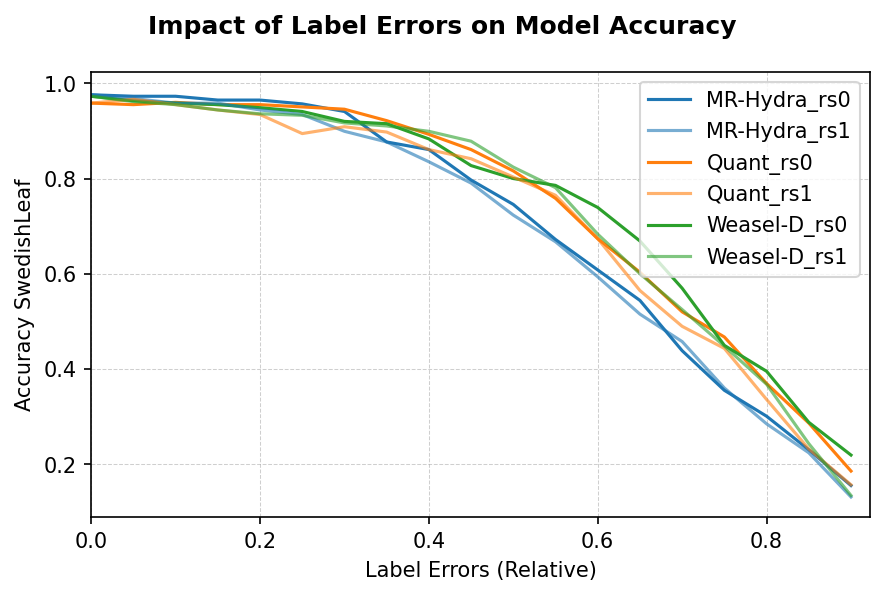

In [ ]:
#Function for unpacking the results in the respective objects
dfs_, clfs_, ds_names, clfs_seed_ = get_frames_and_names(exp_dict = experimental_dict)
---
visualize_acc_decr_multiple(multiple_df=dfs_, vis_names_=clfs_seed_, ds_="SwedishLeaf", filename_="acc_decr", save_fig=True, exp_folder=None)

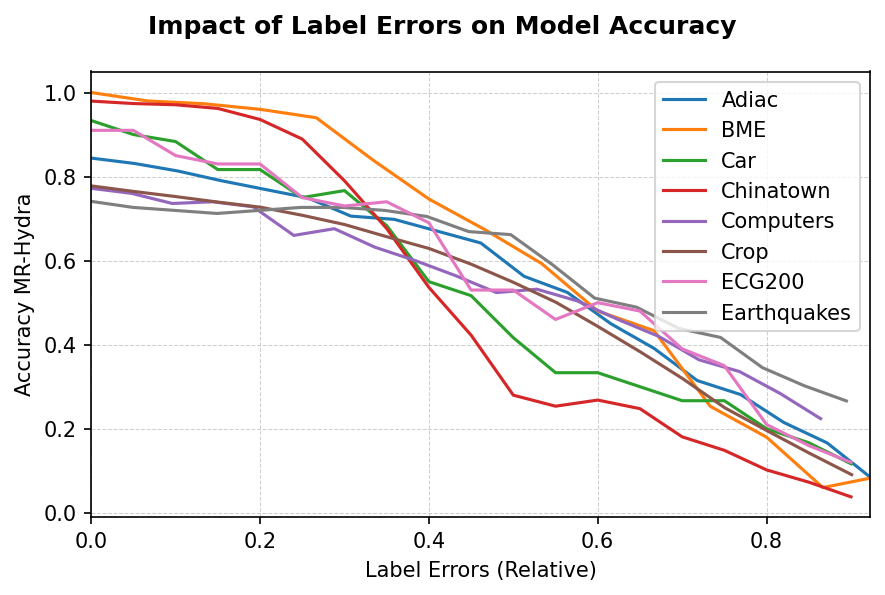

In [18]:
dfs_, clfs_, ds_names, clfs_seed_ = get_frames_and_names(exp_dict = experimental_dict)
visualize_acc_decr_multiple(multiple_df=dfs_, vis_names_=ds_names, ds_="MR-Hydra", filename_="acc_decr", save_fig=True, exp_folder=None)

In [7]:
df_nested = create_nested_df_from_exp_dict(exp_dict= experimental_dict)
df_nested.to_pickle("simulation_results/df_nested.pkl")

In [11]:
x_common=np.linspace(0, 1, 51)
x_common

array([0.  , 0.02, 0.04, 0.06, 0.08, 0.1 , 0.12, 0.14, 0.16, 0.18, 0.2 ,
       0.22, 0.24, 0.26, 0.28, 0.3 , 0.32, 0.34, 0.36, 0.38, 0.4 , 0.42,
       0.44, 0.46, 0.48, 0.5 , 0.52, 0.54, 0.56, 0.58, 0.6 , 0.62, 0.64,
       0.66, 0.68, 0.7 , 0.72, 0.74, 0.76, 0.78, 0.8 , 0.82, 0.84, 0.86,
       0.88, 0.9 , 0.92, 0.94, 0.96, 0.98, 1.  ])

In [12]:
df_nested_interp = unpack_and_interpolate(df_nested, x_common=np.linspace(0, 1, 51))
#nested_super_df.to_pickle("simulation_results/nested_super_df.pkl")
df_nested_interp.to_pickle("simulation_results/df_nested_interp")
df_nested_interp.head()

,dataset,classifier,LE_relative,accuracy
0,Adiac,MR-Hydra,0.00,0.8440
1,Adiac,MR-Hydra,0.02,0.8415
2,Adiac,MR-Hydra,0.04,0.8366
3,Adiac,MR-Hydra,0.06,0.8221
4,Adiac,MR-Hydra,0.08,0.8049


In [14]:
### AGGREGATE results over one classifier and append to nested_df
df_nested_agg = aggregate_accuracy_curvers_multiple(df_nested)
df_nested_agg.to_pickle("simulation_results/df_nested_agg.pkl")



In [ ]:
dataset_properties_ext = ["no_classes", "Type", "Length", "train_size"] 
number_of_class_categories = ["2", "3-5", "6-10", "11+"]
length_categories = ["1-199", "200-499", "500-999", "1000+"]
train_set_size_categories = ["1-99", "100-299", "300-699", "700+"]

nested_super_df_extended = extend_nested_df_with_properties(nested_df=df_nested_interp, dataset_properties=dataset_properties_ext)

nested_super_df_extended.to_pickle("simulation_results/nested_super_df_extended.pkl")
nested_super_df_extended_cat = categorize_dataset_properties(nested_super_df_extended)
nested_super_df_extended_cat.to_pickle("simulation_results/nested_super_df_extended_cat.pkl")


nested_super_df_extended_cat.head()

,dataset,classifier,LE_relative,accuracy,no_classes,Type,Length,train_size,no_classes_cat,Length_cat,train_size_cat
0,Adiac,MR-Hydra,0.00,0.8440,37,IMAGE,176,390,11+,1-199,300-699
1,Adiac,MR-Hydra,0.02,0.8515,37,IMAGE,176,390,11+,1-199,300-699
2,Adiac,MR-Hydra,0.04,0.8638,37,IMAGE,176,390,11+,1-199,300-699
3,Adiac,MR-Hydra,0.06,0.8526,37,IMAGE,176,390,11+,1-199,300-699
4,Adiac,MR-Hydra,0.08,0.8517,37,IMAGE,176,390,11+,1-199,300-699


In [392]:
METRIC_FUNCTIONS = {
    "initial_accuracy": original_accuracy,
    "auc_score": auc_calculator,
    "acc_robustness": acc_robustness_calculator,
    "early_degradation" : early_degradation_point
}

DATASET_PROPERTIES = ["no_classes", "Type", "Length", "train_size"] #


number_of_class_categories = ["2", "3-5", "6-10", "11+"]
length_categories = ["1-199", "200-499", "500-999", "1000+"]
train_set_size_categories = ["1-99", "100-299", "300-699", "700+"]

# "training_size" 
# "rel_training_size" average traininging instances per class (220 instances for 4 classes = 55 instances per class) 
#  "class_imbalance" 0.25, 0.5, 0.75, 1.0 (equal class distribution)
#  "no_classes_cat" 

In [394]:
master_df = generate_master_df(dfs_=dfs_, clfs_=clfs_,
                            ds_names=ds_names,
                            metric_functions=METRIC_FUNCTIONS,
                            dataset_properties=DATASET_PROPERTIES)

master_df['no_classes'] = master_df['no_classes'].astype('category')
master_df['Length'] = master_df['Length'].astype('category')

Original Accuracy: 0.84399
Area Under the Curve (AUC): 0.50472
Normalized Area Under the Curve (AUC): 0.64788
Robustness of Accuracy: 0.63798
Early Degradation Point: 0.28717
Original Accuracy: 0.82609
Area Under the Curve (AUC): 0.50543
Normalized Area Under the Curve (AUC): 0.66285
Robustness of Accuracy: 0.65298
Early Degradation Point: 0.24614
Original Accuracy: 0.82353
Area Under the Curve (AUC): 0.49777
Normalized Area Under the Curve (AUC): 0.65483
Robustness of Accuracy: 0.64534
Early Degradation Point: 0.20512
Original Accuracy: 1.00000
Area Under the Curve (AUC): 0.55822
Normalized Area Under the Curve (AUC): 0.57747
Robustness of Accuracy: 0.56115
Early Degradation Point: 0.16667
Original Accuracy: 1.00000
Area Under the Curve (AUC): 0.56555
Normalized Area Under the Curve (AUC): 0.58506
Robustness of Accuracy: 0.56782
Early Degradation Point: 0.16667
Original Accuracy: 0.97333
Area Under the Curve (AUC): 0.51277
Normalized Area Under the Curve (AUC): 0.54499
Robustness of A

In [395]:
master_df = categorize_dataset_properties(master_df)
master_df.to_csv("simulation_results/master_df.csv", index=False)

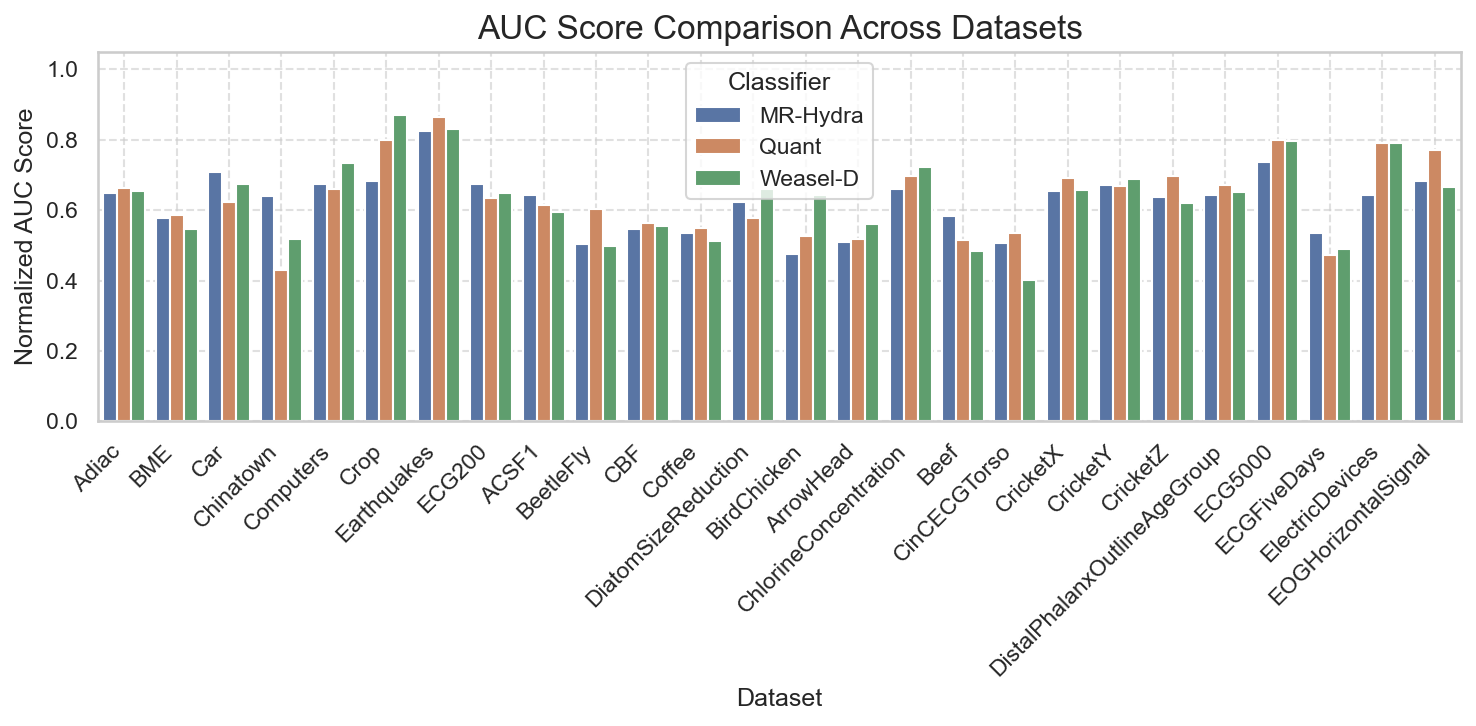

In [396]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming 'auc_summary_df' is your DataFrame
# It should have columns: 'Classifier_name', 'ds_name', 'auc_score'

plt.figure(figsize=(10, 5), dpi=150)
sns.set_theme(style="whitegrid")

# Create a grouped barplot
sns.barplot(
    data=master_df,
    x='ds_name',
    y='auc_score',
    hue='Classifier_name',
    palette='deep'  # 'pastel', 'colorblind', 'deep', 'Set2'
)

# Enhance plot aesthetics
plt.title("AUC Score Comparison Across Datasets", fontsize=16)
plt.xlabel("Dataset", fontsize=12)
plt.ylabel("Normalized AUC Score", fontsize=12)
plt.ylim(0, 1.05)  # AUC ranges from 0 to 1
plt.xticks(rotation=45, ha='right')
plt.legend(title='Classifier')
plt.tight_layout()
plt.grid(True, linestyle='--', alpha=0.6)

plt.show()


In [326]:
master_df

,Classifier_name,ds_name,initial_accuracy,auc_score,acc_robustness,early_degradation,no_classes,Type,Length,train_size,no_classes_cat,Length_cat,train_size_cat
0,MR-Hydra,Adiac,0.84399,0.64788,0.63798,0.28717,37,IMAGE,176,390,11+,1-199,300-699
1,Quant,Adiac,0.82609,0.66285,0.65298,0.24614,37,IMAGE,176,390,11+,1-199,300-699
2,Weasel-D,Adiac,0.82353,0.65483,0.64534,0.20512,37,IMAGE,176,390,11+,1-199,300-699
3,MR-Hydra,BME,1.00000,0.57747,0.56115,0.16666,3,SIMULATED,128,30,3-5,1-199,1-99
4,Quant,BME,1.00000,0.58506,0.56782,0.16666,3,SIMULATED,128,30,3-5,1-199,1-99
...,...,...,...,...,...,...,...,...,...,...,...,...,...
73,Quant,ElectricDevices,0.74284,0.79043,0.78138,0.34082,7,DEVICE,96,8926,6-10,1-199,700+
74,Weasel-D,ElectricDevices,0.76190,0.79075,0.78181,0.28067,7,DEVICE,96,8926,6-10,1-199,700+
75,MR-Hydra,EOGHorizontalSignal,0.63260,0.68282,0.67356,0.29001,12,EOG,1250,362,11+,1000+,300-699
76,Quant,EOGHorizontalSignal,0.69337,0.76954,0.76158,0.42535,12,EOG,1250,362,11+,1000+,300-699


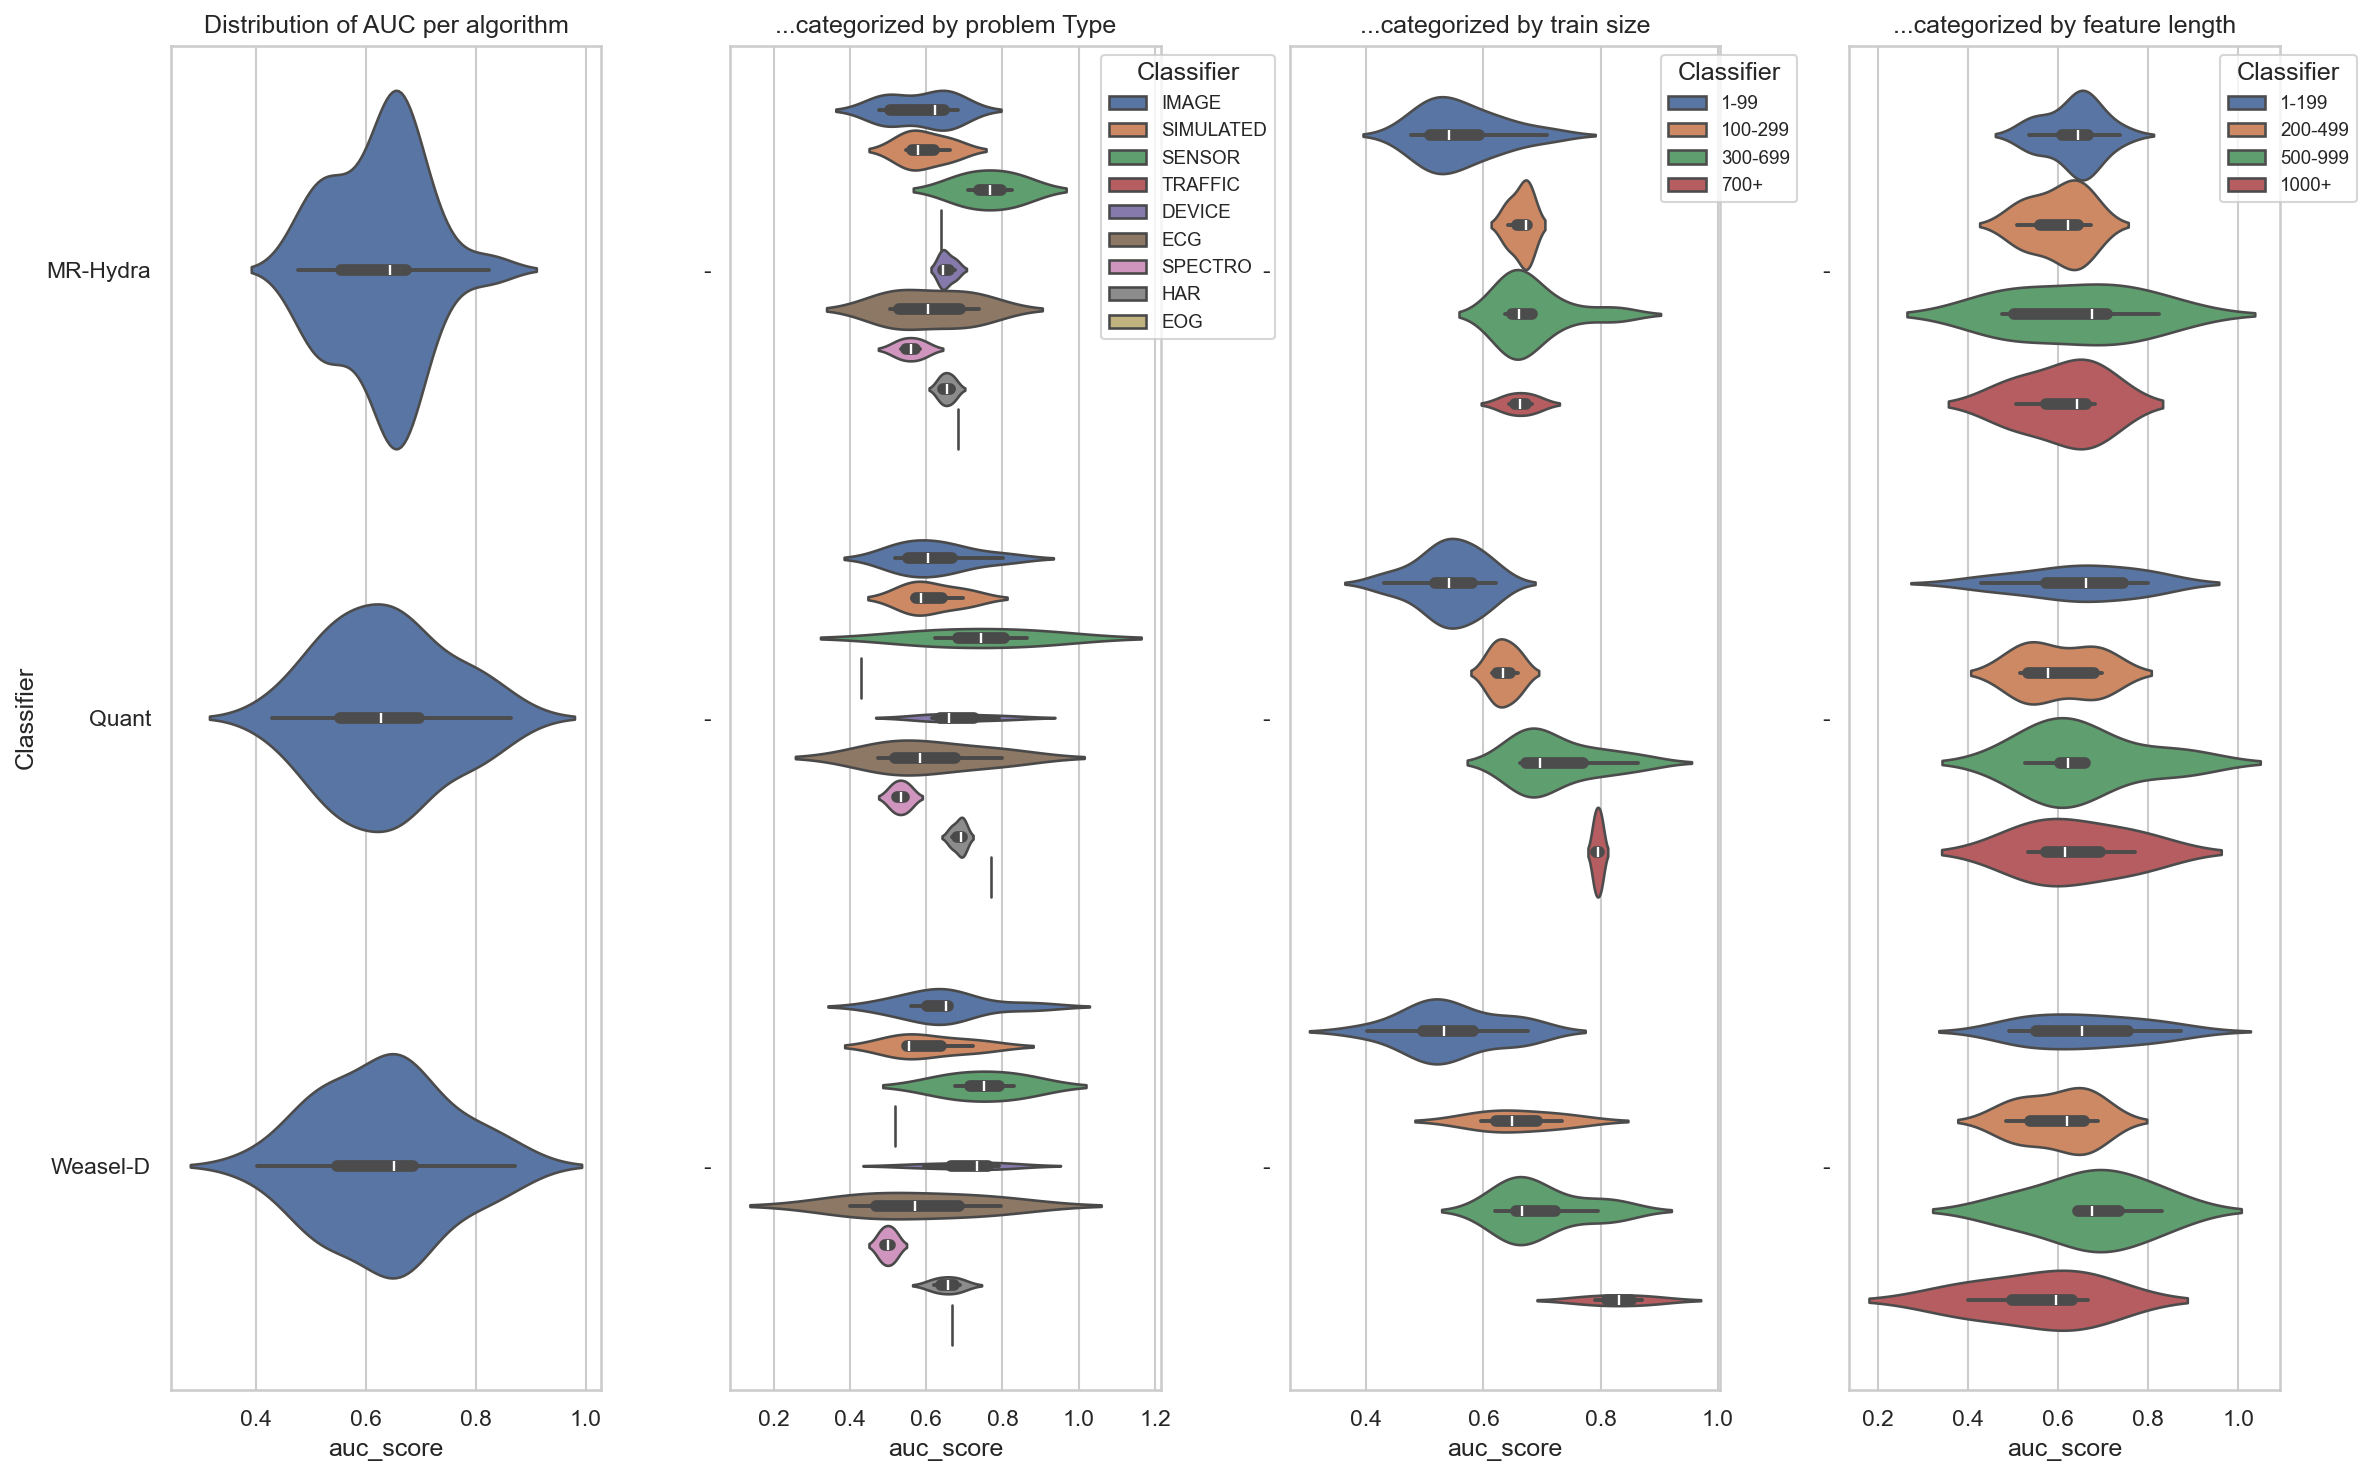

In [397]:
fig, (ax, ax2, ax3, ax4) = plt.subplots(1,4, figsize=(16, 10), dpi=150)

# Create a violin plot for AUC scores by Classifier
sns.violinplot(data=master_df,x="auc_score",y="Classifier_name",inner="box",cut=2,ax=ax)
sns.violinplot(data=master_df,x="auc_score",y="Classifier_name", hue="Type", inner="box",cut=2,ax=ax2)
sns.violinplot(data=master_df,x="auc_score",y="Classifier_name", hue="train_size_cat", inner="box",cut=2,ax=ax3)
sns.violinplot(data=master_df,x="auc_score",y="Classifier_name", hue="Length_cat", inner="box",cut=2,ax=ax4)

# Customization
ax.set_title("Distribution of AUC per algorithm", fontsize=12)
ax2.set_title("...categorized by problem Type", fontsize=12)
ax3.set_title("...categorized by train size", fontsize=12)
ax4.set_title("...categorized by feature length", fontsize=12)

ax.set_ylabel("Classifier")
ax2.set_ylabel("")
ax2.set_yticklabels("---")
ax3.set_ylabel("")
ax3.set_yticklabels("---")
ax4.set_ylabel("")
ax4.set_yticklabels("---")
ax2.legend(title="Classifier", bbox_to_anchor=(0.84, 1.00), loc='upper left', fontsize=9)
ax3.legend(title="Classifier", bbox_to_anchor=(0.84, 1.00), loc='upper left', fontsize=9)
ax4.legend(title="Classifier", bbox_to_anchor=(0.84, 1.00), loc='upper left', fontsize=9)

fig.tight_layout()
fig.subplots_adjust(wspace=0.3)
# fig.savefig("violin_plot.png")

plt.show()

In [314]:
def double_robustness_divider(df_ : pd.DataFrame) -> pd.DataFrame:
    df_copy1 = df_.copy()
    df_copy2 = df_.copy()

    df_copy1["RSC"] = df_copy1["acc_robustness"]
    df_copy1["metric"] = "acc_robustness"
    df_copy1 = df_copy1.drop(columns=["acc_robustness", "auc_score"])

    df_copy2["RSC"] = df_copy2["auc_score"]
    df_copy2["metric"] = "auc_score"
    df_copy2 = df_copy2.drop(columns=["acc_robustness", "auc_score"])

    df_combined = pd.concat([df_copy1, df_copy2], ignore_index=True)
    return df_combined

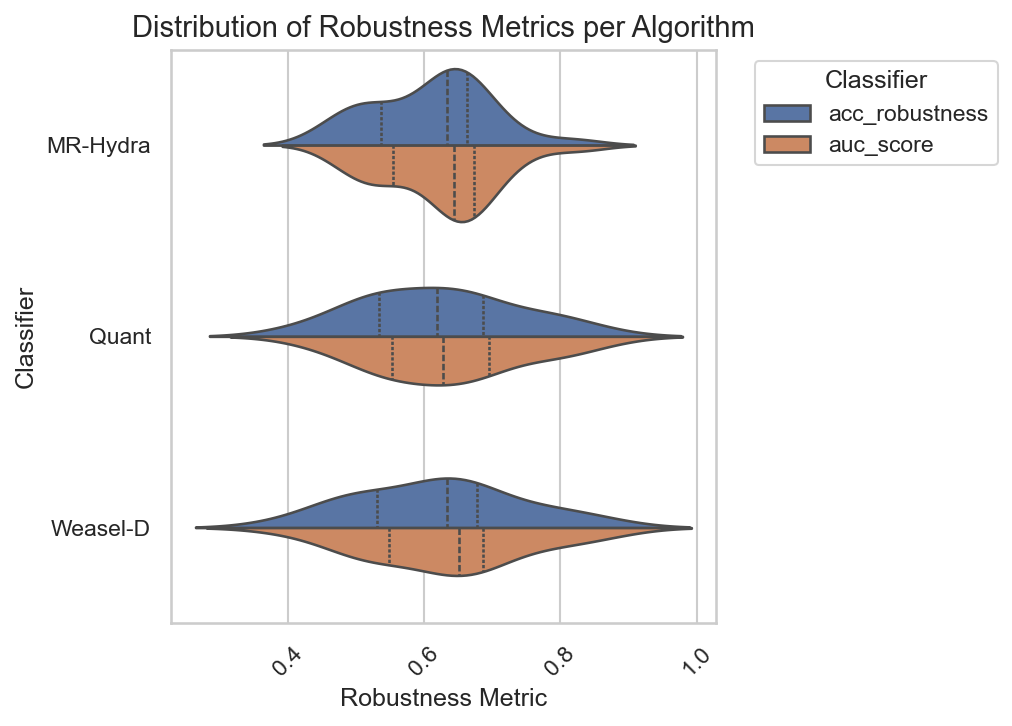

In [ ]:
fig, ax = plt.subplots(figsize=(7, 5), dpi=150)

# Create a violin plot for AUC scores by Classifier
double_df = double_robustness_divider(master_df)
sns.violinplot(data=double_df ,x="RSC",y="Classifier_name",inner="quart",
               hue="metric", split=True,cut=2,ax=ax)

# Customization
ax.set_title("Distribution of Robustness Metrics per Algorithm", fontsize=14)
ax.set_xlabel("Robustness Metric")
ax.set_ylabel("Classifier")
ax.tick_params(axis='x', rotation=45)
ax.legend(title="Classifier", bbox_to_anchor=(1.05, 1), loc='upper left')

fig.tight_layout()
# fig.savefig("violin_plot.png")

plt.show()

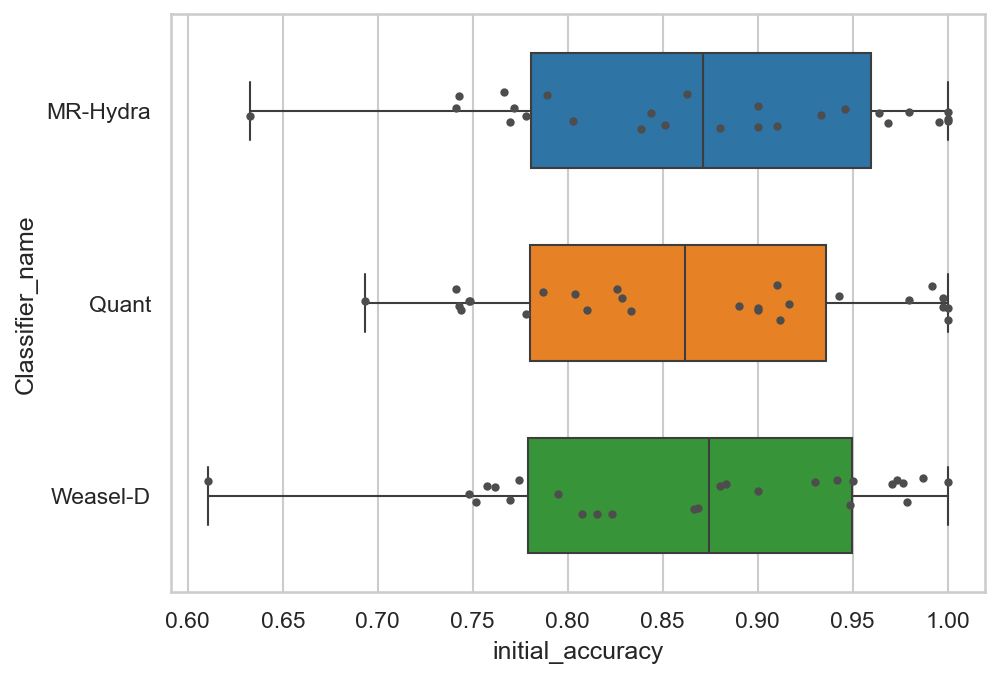

In [398]:
fig, ax = plt.subplots(figsize=(7, 5), dpi=150)

sns.boxplot(
    data=master_df, x="initial_accuracy", y="Classifier_name", #hue
    whis=[0, 100], width=.6, palette="tab10", saturation=0.8, ax=ax)

# Add in points to show each observation
sns.stripplot(master_df, x="initial_accuracy", y="Classifier_name", size=4, color=".3")

ax.xaxis.grid(True)

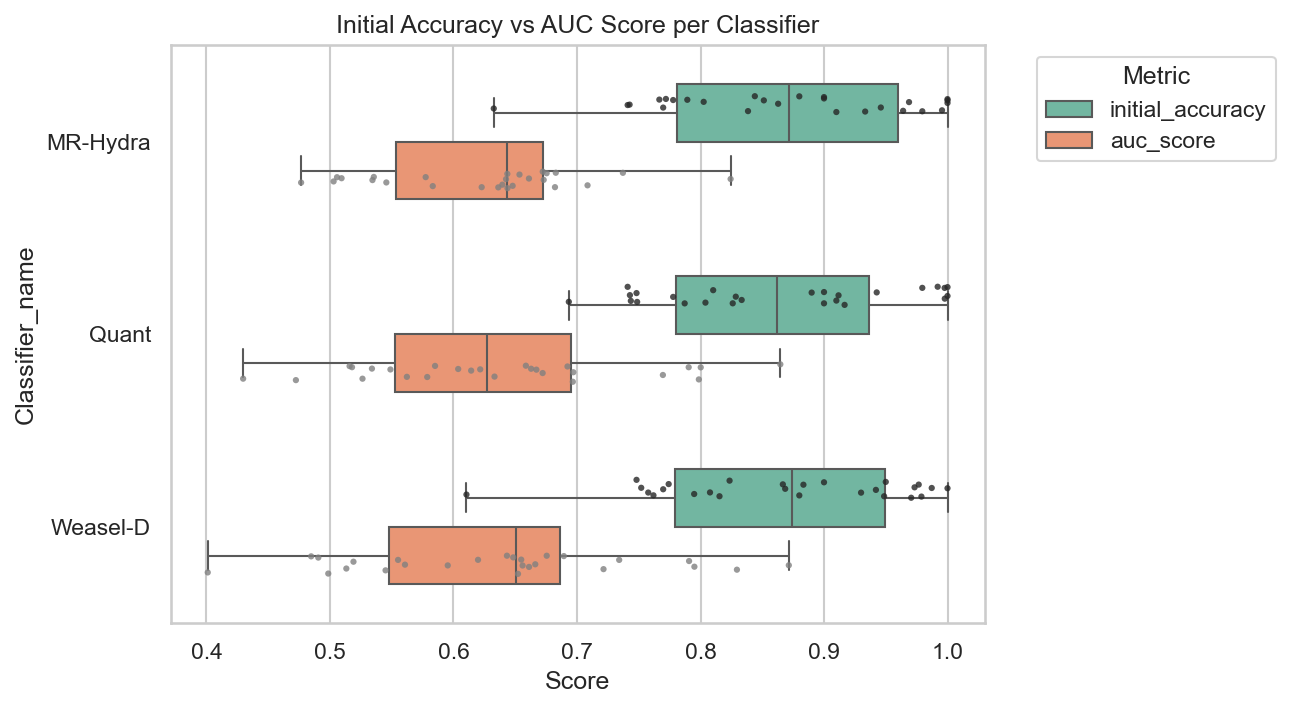

In [377]:
long_df = master_df.melt(
    id_vars=["Classifier_name"],
    value_vars=["initial_accuracy", "auc_score"],
    var_name="Metric",
    value_name="Score"
)

fig, ax = plt.subplots(figsize=(7, 5), dpi=150)

sns.boxplot(
    data=long_df, x="Score", y="Classifier_name", hue="Metric",
    whis=[0, 100], width=0.6, palette="Set2", ax=ax
)

sns.stripplot(
    data=long_df, x="Score", y="Classifier_name", hue="Metric",
    dodge=True, color="gray", size=3, alpha=0.8, ax=ax
)

# Remove the duplicate legend caused by stripplot
handles, labels = ax.get_legend_handles_labels()
ax.legend(handles[:2], labels[:2], title="Metric", bbox_to_anchor=(1.05, 1), loc="upper left")

ax.set_title("Initial Accuracy vs AUC Score per Classifier")
ax.xaxis.grid(True)


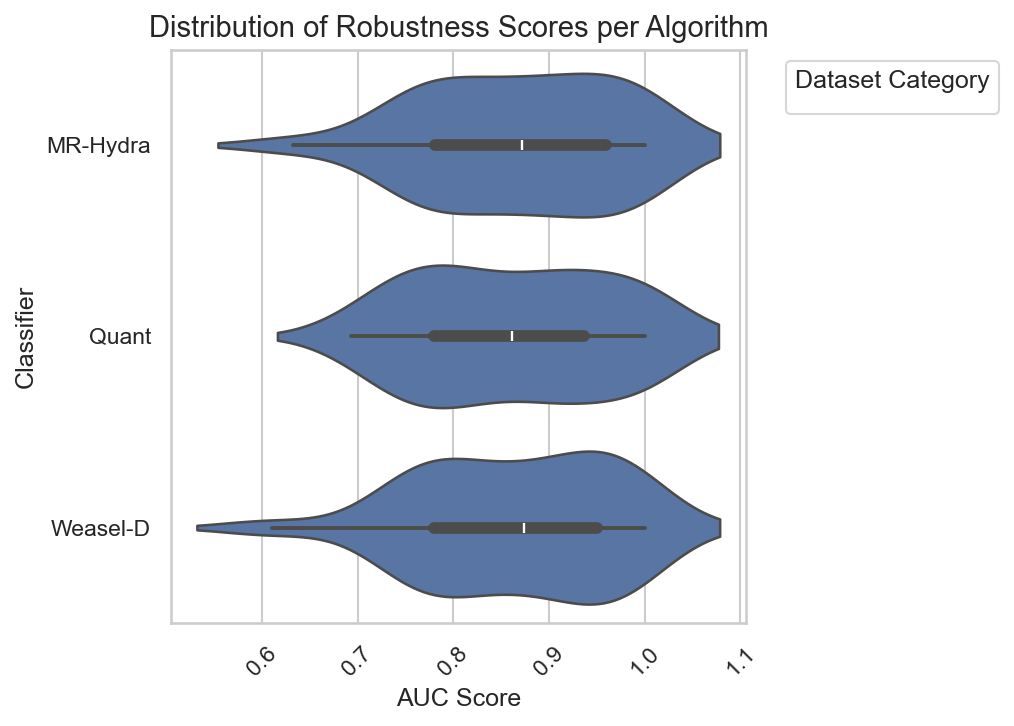

In [378]:
fig, ax = plt.subplots(figsize=(7, 5), dpi=150)

# Create a violin plot for AUC scores by Classifier
sns.violinplot(data=master_df,x="initial_accuracy",y="Classifier_name",inner="box", cut=1.5,ax=ax)

# Customization
ax.set_title("Distribution of Robustness Scores per Algorithm", fontsize=14)
ax.set_xlabel("AUC Score")
ax.set_ylabel("Classifier")
ax.tick_params(axis='x', rotation=45)
ax.legend(title="Dataset Category", bbox_to_anchor=(1.05, 1), loc='upper left')

fig.tight_layout()
# fig.savefig("violin_plot.png")

plt.show()

In [292]:
truth =   (master_df["no_classes_cat"]=="6-10") & (master_df["Classifier_name"] == "MR-Hydra") #| (master_df["no_classes_cat"]=="6-10") #  & (master_df["no_classes_cat"]=="2") |
#master_df.loc[truth, "auc_score"].hist()

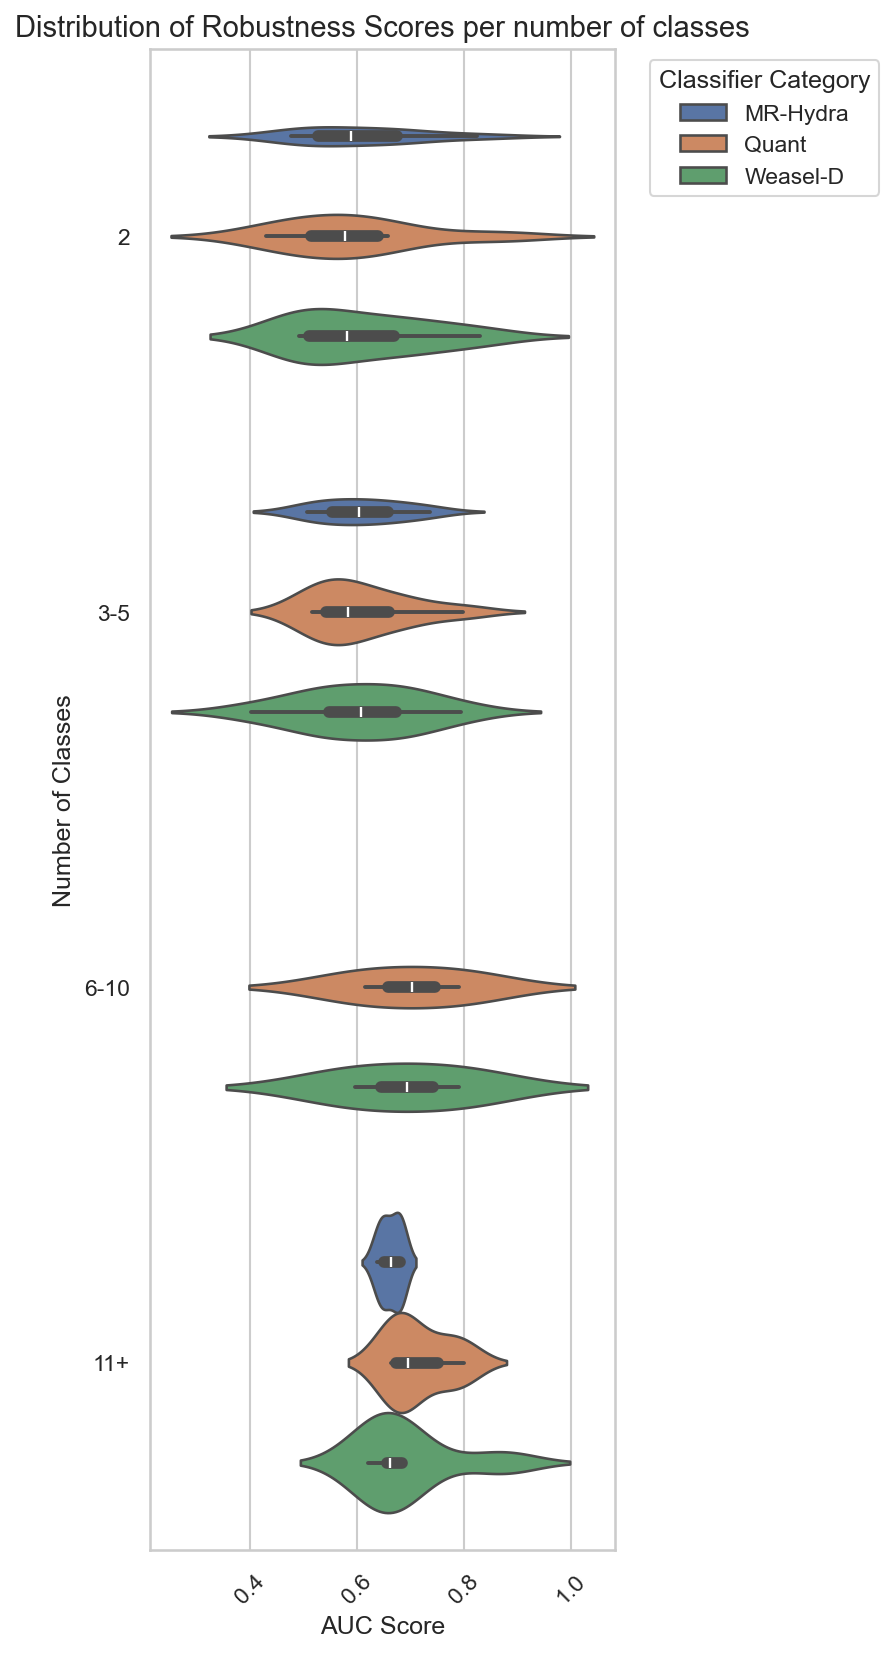

In [379]:
fig, ax = plt.subplots(figsize=(4, 13), dpi=150)

# Create a violin plot for AUC scores by Classifier
sns.violinplot(data=master_df.loc[~truth, :],x="auc_score",y="no_classes_cat",hue="Classifier_name", inner="box",ax=ax)

# Customization
ax.set_title("Distribution of Robustness Scores per number of classes" , fontsize=14)
ax.set_xlabel("AUC Score")
ax.set_ylabel("Number of Classes")
ax.tick_params(axis='x', rotation=45)
ax.legend(title="Classifier Category", bbox_to_anchor=(1.05, 1), loc='upper left')

fig.savefig("violin_plot.png")

plt.show()

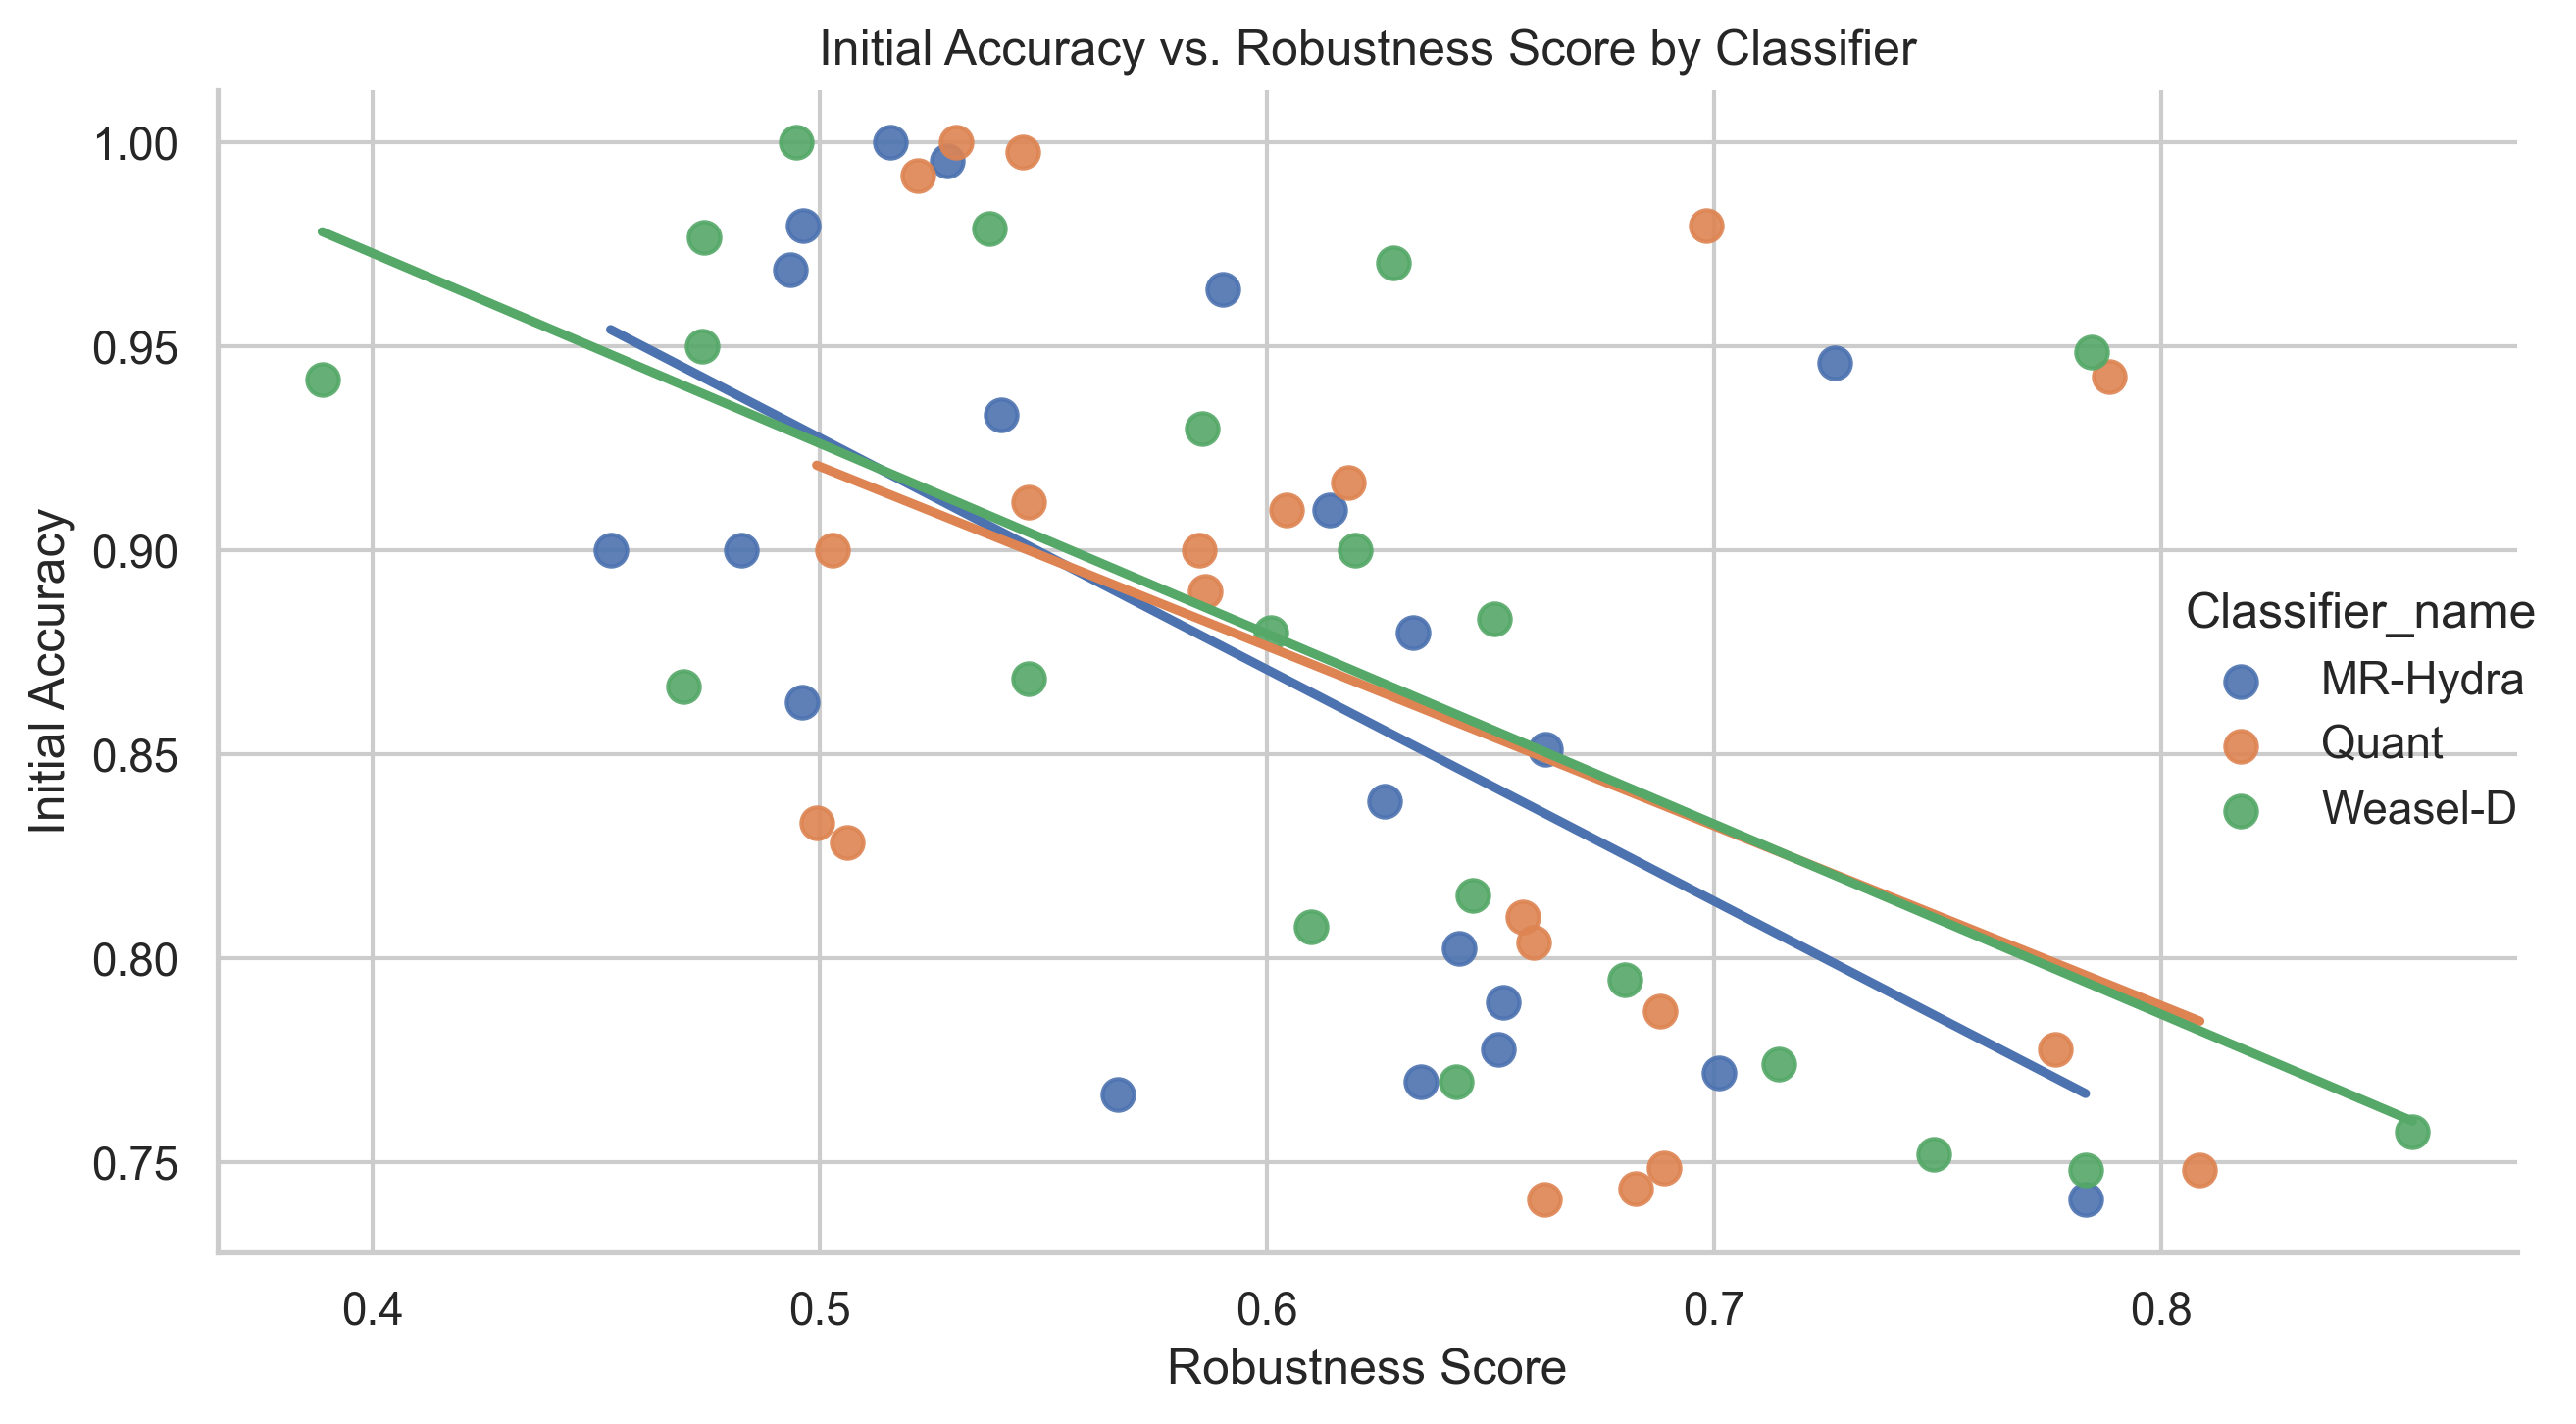

In [150]:
#fig, ax = plt.subplots(figsize=(12, 6), dpi=150)

# Scatterplot: x = auc_score (original accuracy), y = robustness, color = classifier
g= sns.lmplot(
    data=master_df,
    y="initial_accuracy",
    x="acc_robustness",
    hue="Classifier_name",
    ci = None,
    aspect=1.5,
    height=5,
    scatter_kws= {"alpha":0.9, "s": 60},  # marker size
)

g.figure.set_dpi(300)
# Labels and title
plt.title("Initial Accuracy vs. Robustness Score by Classifier")
plt.ylabel("Initial Accuracy")
plt.xlabel("Robustness Score")
#plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', title="Classifier")
plt.tight_layout()
plt.show()

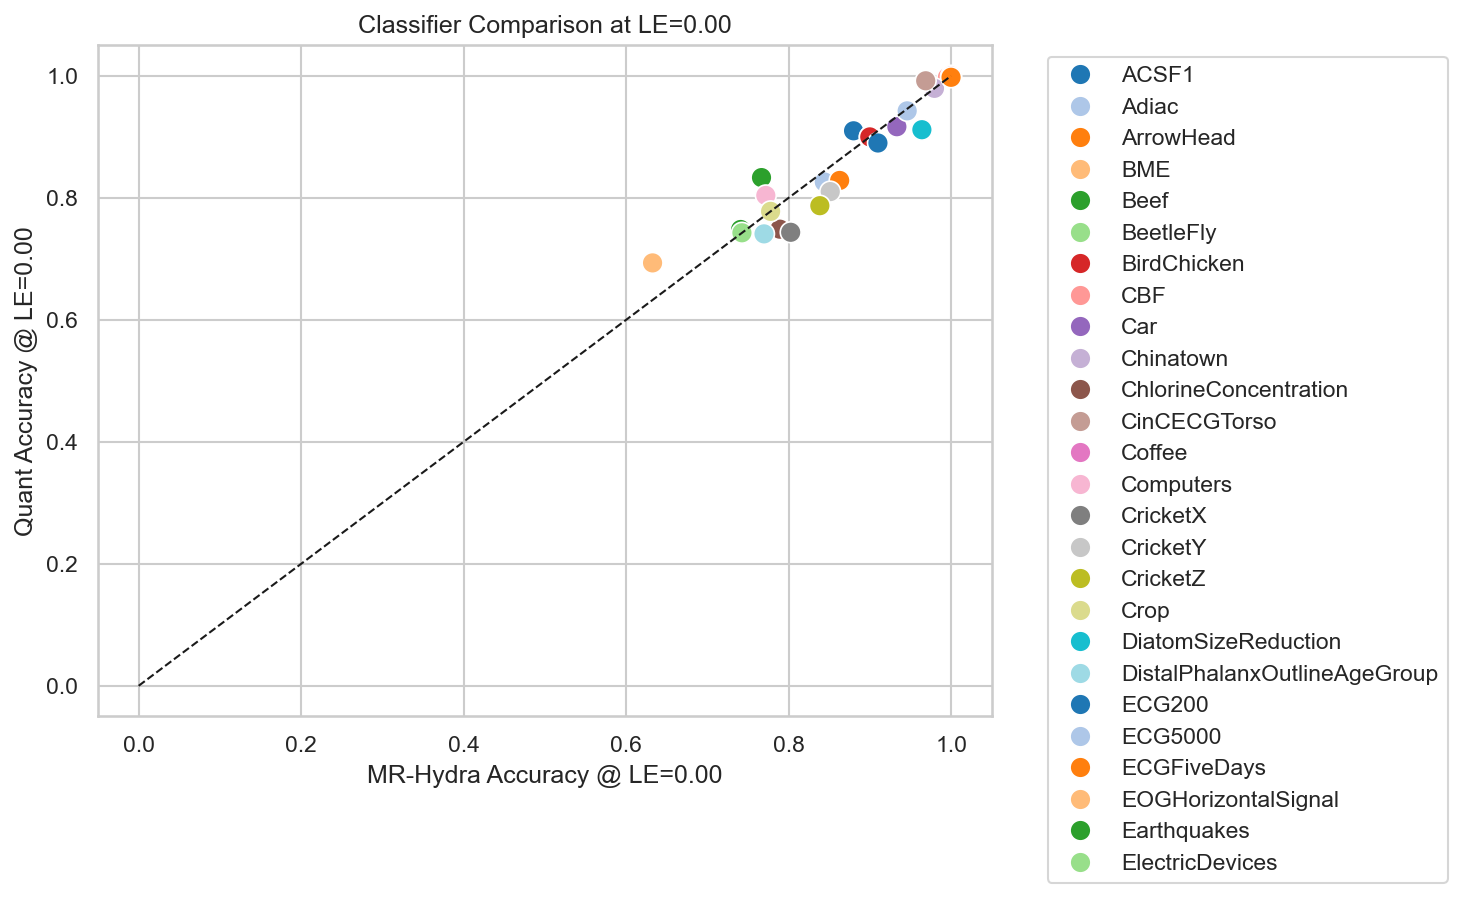

In [294]:
def prepare_comparison_df(flat_df, clf_x, clf_y, target_le=0.0):
    # Filter for target LE level
    filtered = flat_df[(flat_df['LE_relative'] == target_le) & (flat_df['dataset'] != "All")]

    # Pivot so each classifier becomes a column
    pivot_df = filtered.pivot(index='dataset', columns='classifier', values='accuracy')

    # Keep only datasets where both classifiers are present
    pivot_df = pivot_df[[clf_x, clf_y]].dropna().reset_index()

    # Rename for clarity in plotting
    pivot_df.columns = ['dataset', 'accuracy_x', 'accuracy_y']
    return pivot_df



import seaborn as sns
import matplotlib.pyplot as plt

# Define classifiers to compare
clf1 = "MR-Hydra"
clf2 = "Quant"

# Get comparison DataFrame
comparison_df = prepare_comparison_df(nested_super_df, clf1, clf2, target_le=0.00)

# Plot
fig, axs = plt.subplots(1, 1, figsize=(10, 6), dpi=150) 
sns.scatterplot(
    data=comparison_df,
    x="accuracy_x",
    y="accuracy_y",
    hue="dataset",  # optional: adds legend per dataset
    s=100,
    palette="tab20"
)

plt.plot([0, 1], [0, 1], 'k--', linewidth=1, label="")  # reference line
plt.xlabel(f"{clf1} Accuracy @ LE=0.00")
plt.ylabel(f"{clf2} Accuracy @ LE=0.00")
plt.title(f"Classifier Comparison at LE=0.00")
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.grid(True)
plt.show()




In [2]:
nested_super_df_extended_cat = pd.read_pickle("simulation_results/nested_super_df_extended_cat.pkl")

In [3]:
nested_super_df_extended_cat.head()

,dataset,classifier,LE_relative,accuracy,no_classes,Type,Length,train_size,no_classes_cat,Length_cat,train_size_cat
0,Adiac,MR-Hydra,0.00,0.8440,37,IMAGE,176,390,11+,1-199,300-699
1,Adiac,MR-Hydra,0.02,0.8515,37,IMAGE,176,390,11+,1-199,300-699
2,Adiac,MR-Hydra,0.04,0.8638,37,IMAGE,176,390,11+,1-199,300-699
3,Adiac,MR-Hydra,0.06,0.8526,37,IMAGE,176,390,11+,1-199,300-699
4,Adiac,MR-Hydra,0.08,0.8517,37,IMAGE,176,390,11+,1-199,300-699


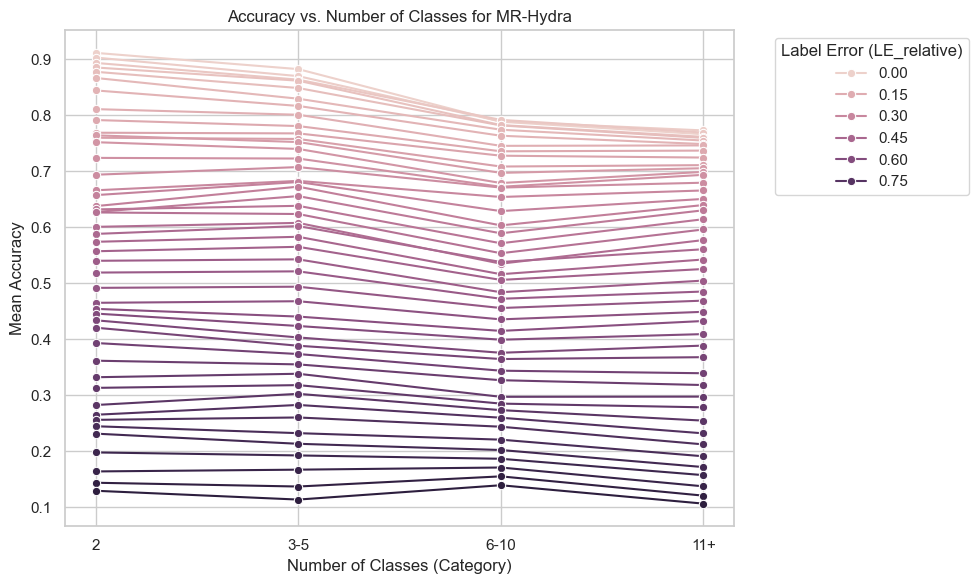

In [17]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

#1 Filter for one classifier
selected_clf = "MR-Hydra"  # You can change this to any classifier in your data
df_clf = nested_super_df_extended_cat[nested_super_df_extended_cat['classifier'] == selected_clf]


#2 Filter LE_relative to include only every 10% step (0.00, 0.10, ..., 0.90)
valid_le_levels = [round(x / 100, 2) for x in range(0, 100, 2)]  # [0.0, 0.1, ..., 0.9]
df_clf = df_clf[df_clf['LE_relative'].isin(valid_le_levels)]


#3 Group by no_classes_cat and LE_relative
grouped = (
    df_clf
    .groupby(['no_classes_cat', 'LE_relative'])
    .agg(mean_accuracy=('accuracy', 'mean'), std_accuracy=('accuracy', 'std'))
    .reset_index()
)

# Plotting
plt.figure(figsize=(10, 6))
sns.set_theme(style="whitegrid")

# Lineplot: One line per LE_relative
sns.lineplot(
    data=grouped,
    x='no_classes_cat',
    y='mean_accuracy',
    hue='LE_relative',
    marker='o',
    err_style='band',
    ci=None  # Use your own std if desired
)

plt.title(f"Accuracy vs. Number of Classes for {selected_clf}")
plt.xlabel("Number of Classes (Category)")
plt.ylabel("Mean Accuracy")
plt.legend(title="Label Error (LE_relative)", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


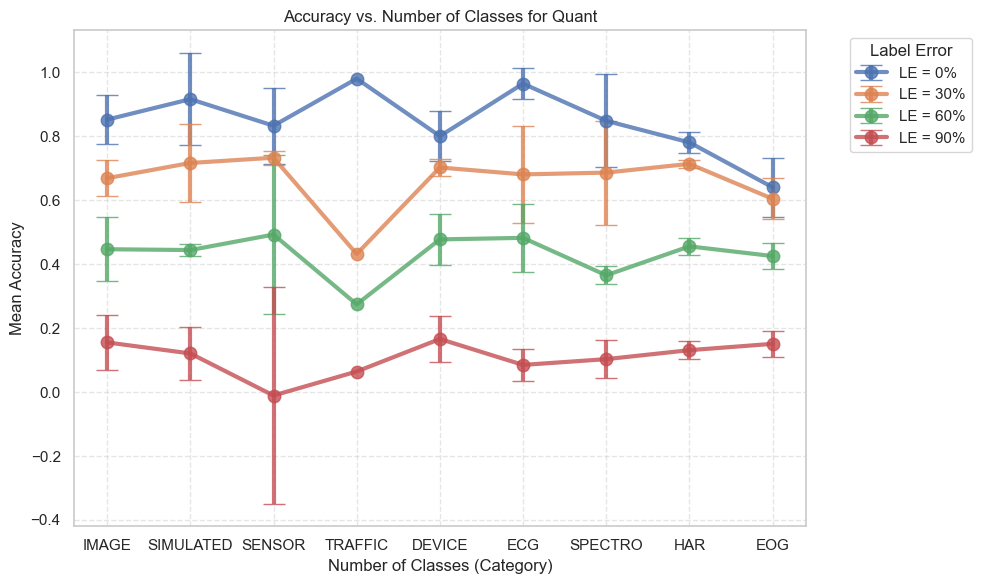

In [23]:
import pandas as pd
import matplotlib.pyplot as plt

#Visualize average ACC (MEAN) & Variation (STB) grouped by DATASET PROPERTY
#Filter by: Classifier, LE_relative levels
#Group by: LE_relative, dataset_property
ds_property_to_group = 'Type'      # 'no_classes_cat'  'Length_cat'




# Step 1: Filter for a specific classifier
selected_clf = "Quant"  # You can change this to any classifier in your data
df_clf = nested_super_df_extended_cat[nested_super_df_extended_cat['classifier'] == selected_clf]

# Step 2: Filter LE_relative to include only every 10% step (0.00, 0.10, ..., 0.90)
valid_le_levels = [round(x / 100, 2) for x in range(0, 100, 30)]  # [0.0, 0.1, ..., 0.9]
df_clf = df_clf[df_clf['LE_relative'].isin(valid_le_levels)]

# Step 3: Group and aggregate
grouped = (
    df_clf
    .groupby(['LE_relative', ds_property_to_group])
    .agg(mean_accuracy=('accuracy', 'mean'), std_accuracy=('accuracy', 'std'))
    .reset_index()
)

# Step 4: Plot manually with error bars
plt.figure(figsize=(10, 6))
plt.grid(True, linestyle='--', alpha=0.5)

# Plot each LE_relative as its own line with error bars
for le_value in sorted(grouped['LE_relative'].unique()):
    subset = grouped[grouped['LE_relative'] == le_value]
    plt.errorbar(
        x=subset[ds_property_to_group],
        y=subset['mean_accuracy'],
        yerr=subset['std_accuracy'],
        label=f"LE = {int(le_value * 100)}%",
        marker='o',
        markersize=9,
        capsize=8,
        linestyle='-',  # line between points
        linewidth=3,
        alpha=0.8
    )

# Labels and legend
plt.title(f"Accuracy vs. Number of Classes for {selected_clf}")
plt.xlabel("Number of Classes (Category)")
plt.ylabel("Mean Accuracy")
plt.legend(title="Label Error", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()
